In [138]:
# Library

library(aplpack)
library(biotools)
library(car)
library(dplyr)
library(ggplot2)
library(ggpubr)
library(knitr)
library(matlib)
library(MVA)
library(MVN)
library(readxl)
library('RVAideMemoire')

# Pertemuan 1

## Load Data

In [2]:
# using url github

url <- "https://raw.githubusercontent.com/rii92/tugas-APG/main/28%20februari%202022/tugas%20kedua%20APG.csv"
data <- read.csv(url)
data

x1,x2,x3
<int>,<int>,<int>
9,12,3
2,8,4
6,6,0
5,4,2
8,10,1


## Analisis Deskriptif

## Analisis Hubungan Antar Variabel

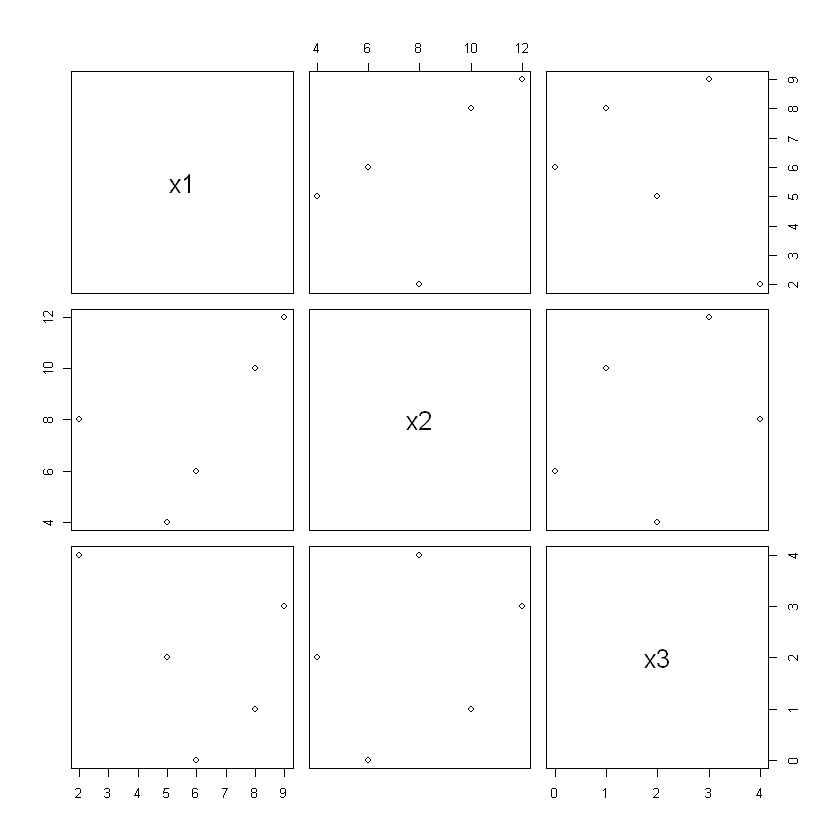

In [3]:
### Bivariate scatterplot
pairs(data)

effect of variables:
 modified item       Var 
 "height of face   " "x1"
 "width of face    " "x2"
 "structure of face" "x3"
 "height of mouth  " "x1"
 "width of mouth   " "x2"
 "smiling          " "x3"
 "height of eyes   " "x1"
 "width of eyes    " "x2"
 "height of hair   " "x3"
 "width of hair   "  "x1"
 "style of hair   "  "x2"
 "height of nose  "  "x3"
 "width of nose   "  "x1"
 "width of ear    "  "x2"
 "height of ear   "  "x3"


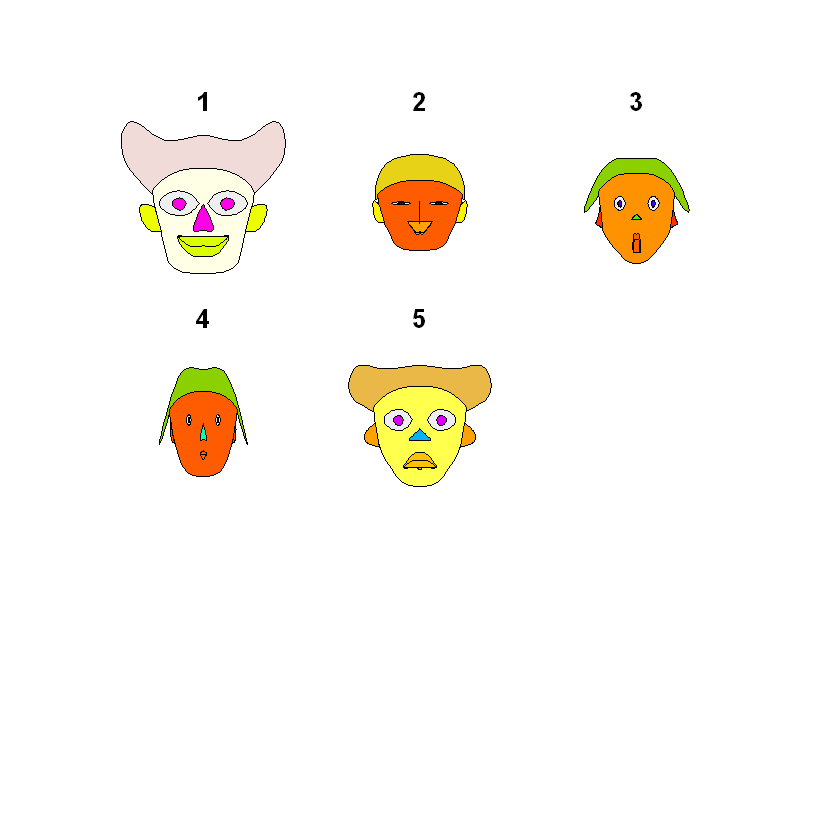

In [4]:
### chernoff face
faces(data)

# Pertemuan 2

## Load Data

In [5]:
# using url github

url <- "https://raw.githubusercontent.com/rii92/tugas-APG/main/28%20februari%202022/tugas%20kedua%20APG.csv"
data <- read.csv(url)
data

x1,x2,x3
<int>,<int>,<int>
9,12,3
2,8,4
6,6,0
5,4,2
8,10,1


In [6]:
# manually 2.0

data <- matrix(c(9, 12, 3
              , 2, 8, 4
              , 6, 6, 0
              , 5, 4, 2
              , 8, 10, 1), ncol=3, byrow=T)

data

9,12,3
2,8,4
6,6,0
5,4,2
8,10,1


## Sample Covariance Matrix

### way 1 -> Using R Built-In

In [7]:
cov(data)

7.50,5.0,-1.75
5.00,10.0,1.50
-1.75,1.5,2.50


### way 2 -> Manually using \vec d_{i}

In [8]:
# utility function to get sij
getSij <- function(X, i, j){
  # number of obs.
  n <- nrow(X)
  
  # vector of 1s
  v1 <- rep(1, times=n)
  
  # deviation of ith variable from it means
  di <- X[ , i] - mean(X[ ,i]) * v1
  
  # deviation of jth variable from it means
  dj <- X[ , j] - mean(X[ ,j]) * v1
    
  return(
    (di%*%dj)/(n-1)
  )
}

manualCov1 <- function(X){
  # initialize covariance matrix S of size pxp
  p <- ncol(X)
  S <- matrix(rep(0, times=p^2), ncol=p)
  
  # populate covariance matrix
  for(i in 1 : p){
    for(j in 1 : p){
      if(i > j){
        S[i, j] <- S[j, i]
      } else{
        S[i, j] <- getSij(X, i, j)
      }
      
    }
  }
  
  return(S)
}

manualCov1(data)

7.50,5.0,-1.75
5.00,10.0,1.50
-1.75,1.5,2.50


### way 3 -> Manually using S = \frac{1}{n-1} \sum (\vec x_{i}-\bar x)(\vec x_{i}-\bar x)^T

In [9]:
# convert data to matrix
data <- data.matrix(data)

# utility function to calculate Ai
getA <- function(X, i){
  return(
     (X[i, ]-colMeans(X)) 
       %*% 
        t(X[i, ]-colMeans(X))
    )
}

manualCov2 <- function(X){
  # initialize covariance matrix S of size pxp
  p <- ncol(X)
  S <- matrix(rep(0, times=p^2), ncol=p)
  
  # number of obs
  n <- nrow(X)
  
  # sum Ai over i
  for(i in 1 : nrow(X)){
    S <- S + getA(X, i)
  }
  
  return(S/(n-1))
}

manualCov2(data)

7.50,5.0,-1.75
5.00,10.0,1.50
-1.75,1.5,2.50


## Sample Correlation Matrix

### way 1 -> Using R Built-In Function

In [10]:
cor(data)

1.0000000,0.5773503,-0.4041452
0.5773503,1.0000000,0.3000000
-0.4041452,0.3000000,1.0000000


### way 2 -> manually using R = D^{-1/2} SD^{-1/2}

In [11]:
# utility function to get D^-1/2
getInvSqrtD <- function(S){
  diag <- 1/sqrt(diag(S))
  return(diag(diag, nrow=ncol(S)))
}

manualCor <- function(S){
  return(
    getInvSqrtD(S)%*%S%*%getInvSqrtD(S)
  )
}

# compute sample covariance matrix
S <- manualCov1(data)
R <- manualCor(S)

# compute sample correlation matrix
R

1.0000000,0.5773503,-0.4041452
0.5773503,1.0000000,0.3000000
-0.4041452,0.3000000,1.0000000


## Eigenvalue & Eigenvector

In [12]:
### Eigenvalue & Eigenvector of the Covariance Matrix
eigen(S)

eigen() decomposition
$values
[1] 13.9049009  5.4143634  0.6807358

$vectors
             [,1]       [,2]       [,3]
[1,] -0.613679310  0.6232975  0.4846627
[2,] -0.789496144 -0.4769002 -0.3863444
[3,] -0.009671757 -0.6197309  0.7847548


In [13]:
### Eigenvalue & Eigenvector of the Correlation Matrix
eigen(R)

eigen() decomposition
$values
[1] 1.591638 1.273514 0.134848

$vectors
           [,1]       [,2]       [,3]
[1,]  0.7490653 -0.2047782  0.6300533
[2,]  0.6347139  0.4943479 -0.5939347
[3,] -0.1898407  0.8447994  0.5002744


Terlihat bahwa eigenvector dari matriks Korelasi yang diperoleh melalui built-in function di R persis sama dengan perhitungan manual. Hal ini dimungkinkan karena pemilihan komponen X3 pada eigenvector matrix korelasi secara manual telah disesuaikan dengan output yang diperoleh di R. Pemilihan X3 yang berbeda tentunya akan menghasilkan eigenvector yang berbeda pula. Hal ini menunjukkan sifat ketidakunikan eigenvector untuk suatu eigenvalue tertentu.


# Pertemuan 3

## Load Data

In [14]:
# manually 1.0

fuel <- c(16.44, 7.19, 9.92, 4.24, 11.2, 14.25, 13.5, 13.32, 29.11, 12.68, 7.51
          , 9.9, 10.25, 11.11, 12.17, 10.24, 10.18, 8.88, 12.34, 8.51, 26.16
          , 12.95, 16.93, 14.7, 10.32)

repair <- c(12.43, 2.7, 1.35, 5.78, 5.05, 5.78, 10.98, 14.27, 15.09, 7.61, 5.8
            , 3.63, 5.07,6.16, 14.26, 2.59, 6.05, 2.7, 7.73, 14.02, 17.44, 8.24
            , 13.37, 10.78, 5.16)

capital <- c(11.23, 3.92, 9.75, 7.78, 10.67, 9.88, 10.6, 9.45, 3.28, 10.23, 8.13
             , 9.13, 10.17, 7.61, 14.39, 6.09, 12.14, 12.23, 11.68, 12.01, 16.89
             , 7.18, 17.59, 14.58, 17)

data <- data.frame(fuel, repair, capital)
kable(data)



|  fuel| repair| capital|
|-----:|------:|-------:|
| 16.44|  12.43|   11.23|
|  7.19|   2.70|    3.92|
|  9.92|   1.35|    9.75|
|  4.24|   5.78|    7.78|
| 11.20|   5.05|   10.67|
| 14.25|   5.78|    9.88|
| 13.50|  10.98|   10.60|
| 13.32|  14.27|    9.45|
| 29.11|  15.09|    3.28|
| 12.68|   7.61|   10.23|
|  7.51|   5.80|    8.13|
|  9.90|   3.63|    9.13|
| 10.25|   5.07|   10.17|
| 11.11|   6.16|    7.61|
| 12.17|  14.26|   14.39|
| 10.24|   2.59|    6.09|
| 10.18|   6.05|   12.14|
|  8.88|   2.70|   12.23|
| 12.34|   7.73|   11.68|
|  8.51|  14.02|   12.01|
| 26.16|  17.44|   16.89|
| 12.95|   8.24|    7.18|
| 16.93|  13.37|   17.59|
| 14.70|  10.78|   14.58|
| 10.32|   5.16|   17.00|

## Outlier Detection

### Bivariate Scatterplot

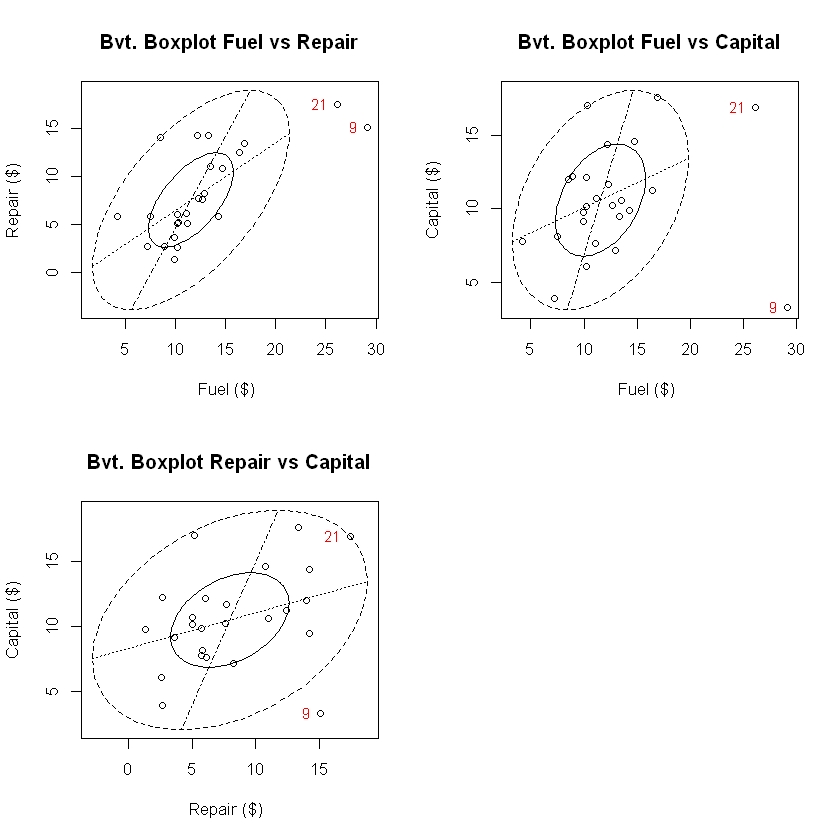

In [15]:
# set plot display parameter
par(mfrow = c(2, 2)) # Create a 2 x 2 plotting matrix
mat <- matrix(c(1, 2, 3, 0), nrow=2, byrow=T)
layout(mat)

# bivariate scatterplot with confidence area
bvbox(data[c(1, 2)], xlab = "Fuel ($) ", ylab = "Repair ($)", main = "Bvt. Boxplot Fuel vs Repair")
  text(data$fuel[21], data$repair[21], labels="21", cex = 0.9, pos = 2, col = "red")
  text(data$fuel[9], data$repair[9], labels="9", cex = 0.9, pos = 2, col = "red")

bvbox(data[c(1, 3)], xlab = "Fuel ($) ", ylab = "Capital ($)", main = "Bvt. Boxplot Fuel vs Capital")
  text(data$fuel[21], data$capital[21], labels="21", cex = 0.9, pos = 2, col = "red")
  text(data$fuel[9], data$capital[9], labels="9", cex = 0.9, pos = 2, col = "red")

bvbox(data[c(2, 3)], xlab = "Repair ($) ", ylab = "Capital ($)", main = "Bvt. Boxplot Repair vs Capital")
  text(data$repair[21], data$capital[21], labels="21", cex = 0.9, pos = 2, col = "red")
  text(data$repair[9], data$capital[9], labels="9", cex = 0.9, pos = 2, col = "red")

### Univariate QQ-Plot

#### Using Available R Package

[1]  9 21

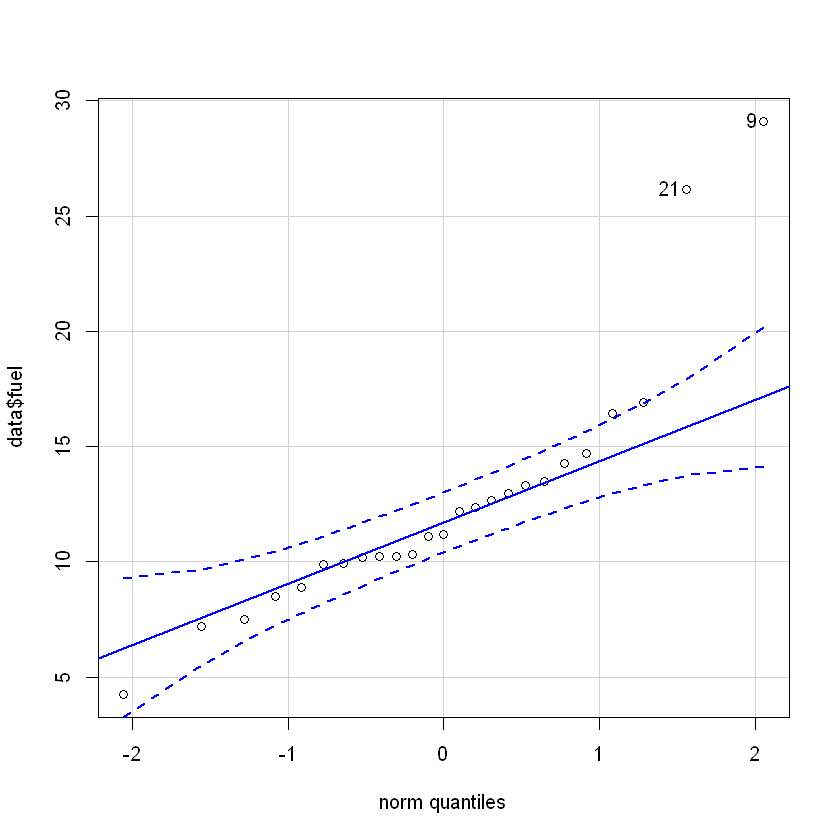

[1] 21  9

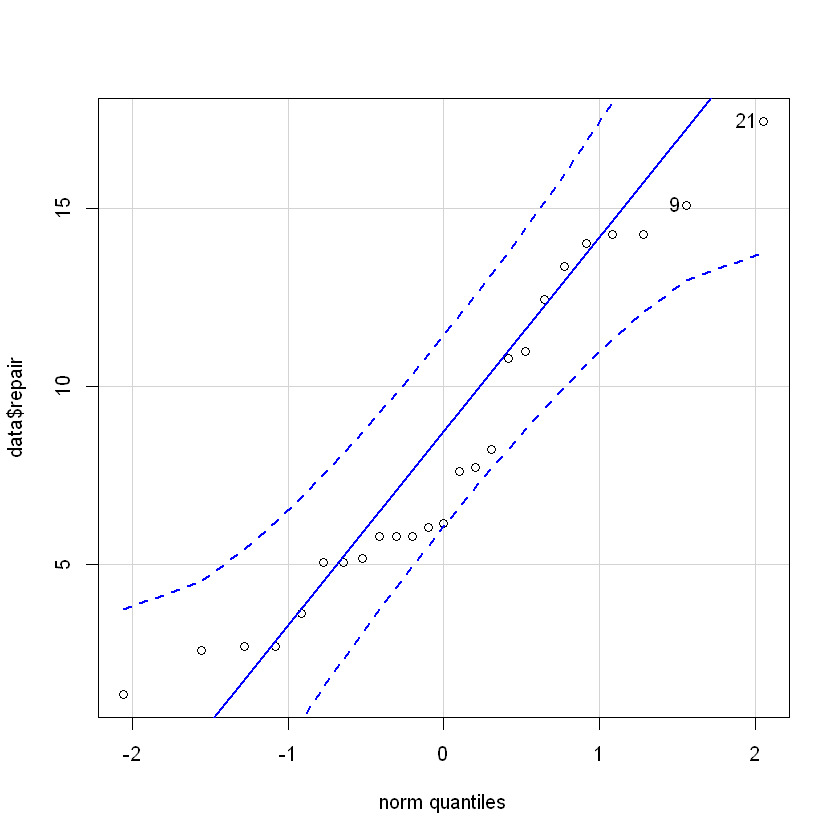

[1]  9 23

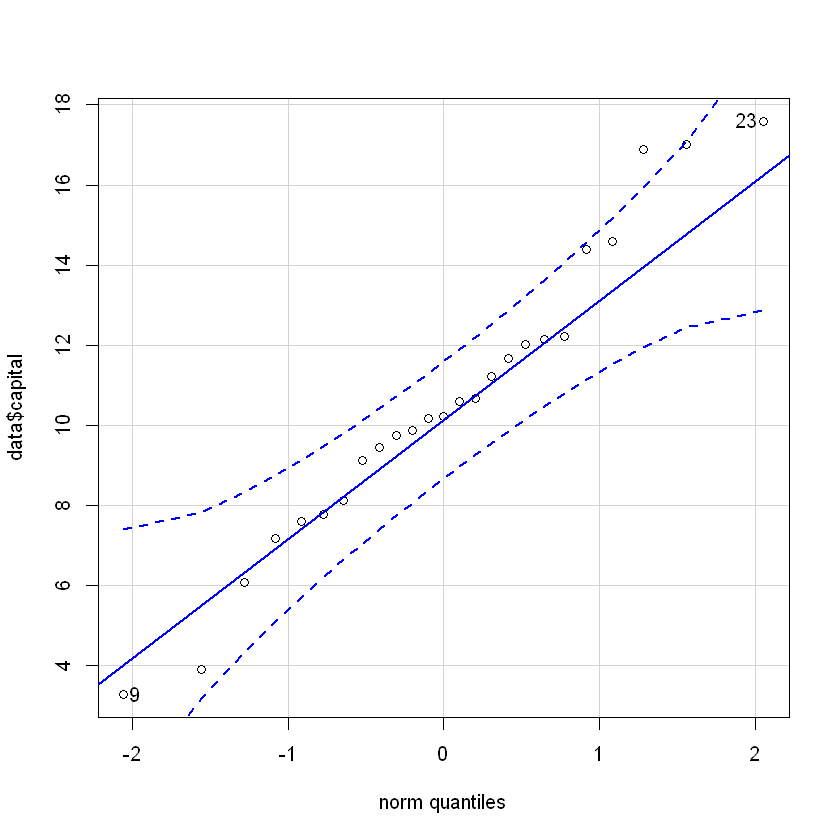

In [16]:
qqPlot(data$fuel)
qqPlot(data$repair)
qqPlot(data$capital)

#### Using Manually Defined Function

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



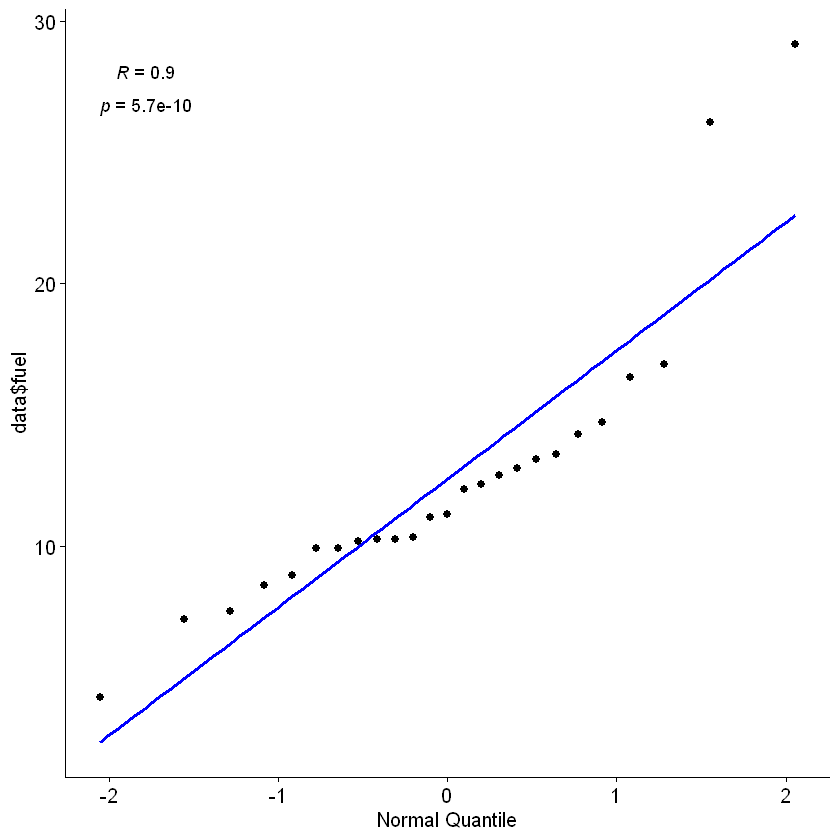

`geom_smooth()` using formula 'y ~ x'



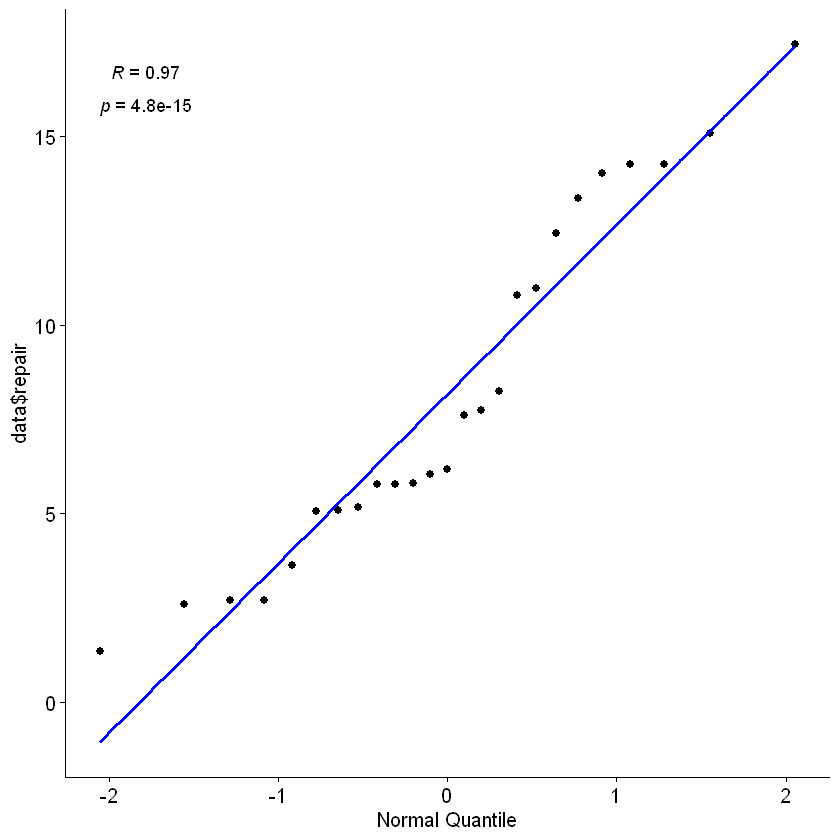

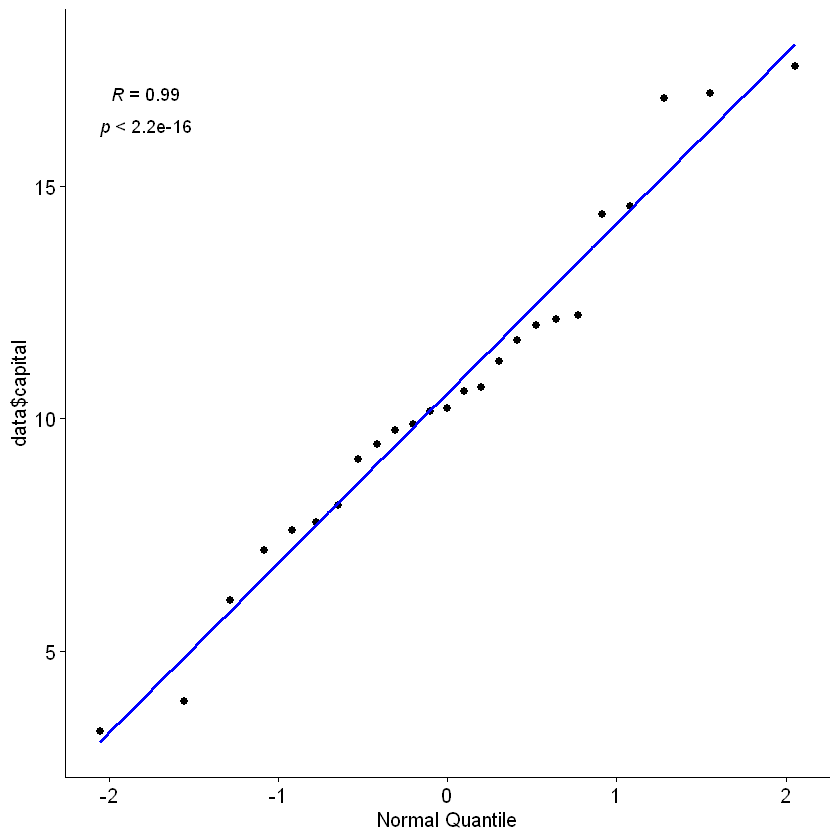

In [17]:
manualQQplot <- function(obs){
  
  # number of observation
  n <- length(obs)
  
  # empirical quantile
  empQuantile <- sort(obs)
  
  # empirical CDF
  empCDF <- 1:n
  empCDF <- (empCDF - 0.5) / n
  
  # theoretical quantile from N(0, 1)
  theoQuantile <- qnorm(empCDF)
  
  # plot empirical and theoretical quantile
  sp <- ggscatter(data.frame(empQuantile, theoQuantile)
                   , x = "theoQuantile", y = "empQuantile"
                   , xlab = "Normal Quantile"
                   , ylab = deparse(substitute(obs))
                   , add = "reg.line"  
                   , add.params = list(color = "blue") 
                )
   
  # Add correlation coefficient
  sp + stat_cor(method = "pearson", label.sep = "\n")
  
}

manualQQplot(data$fuel)
manualQQplot(data$repair)
manualQQplot(data$capital)

### Chi-Square Plot

#### Using MVN Package

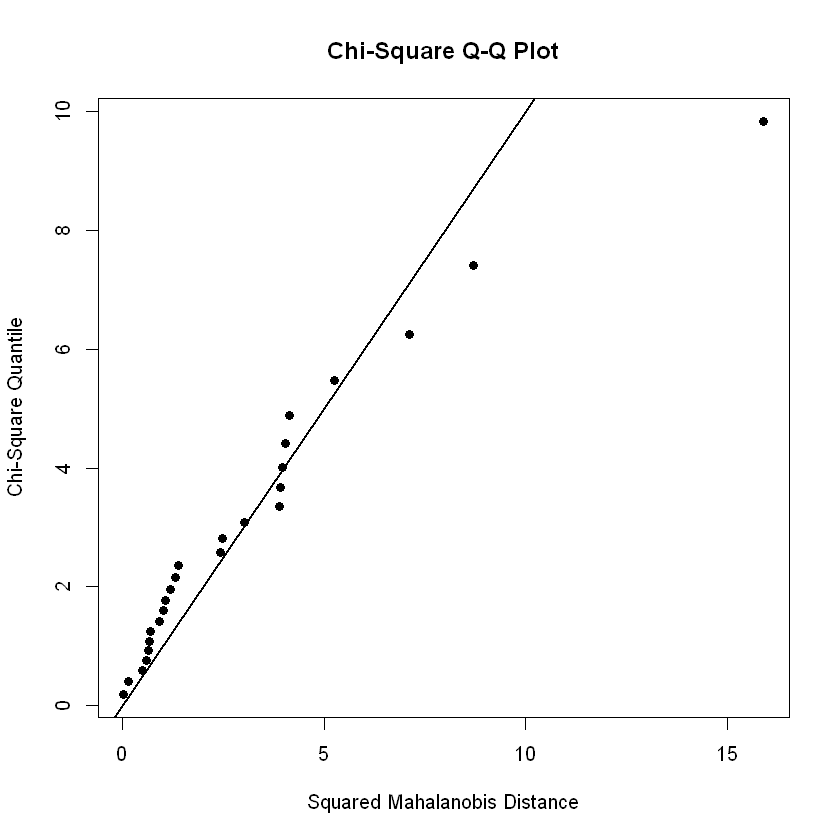

In [18]:
chisquare_plot <- mvn(data, multivariatePlot = "qq")

#### Using Manually Defined Function


Attaching package: 'matlib'


The following object is masked from 'package:rgl':

    GramSchmidt




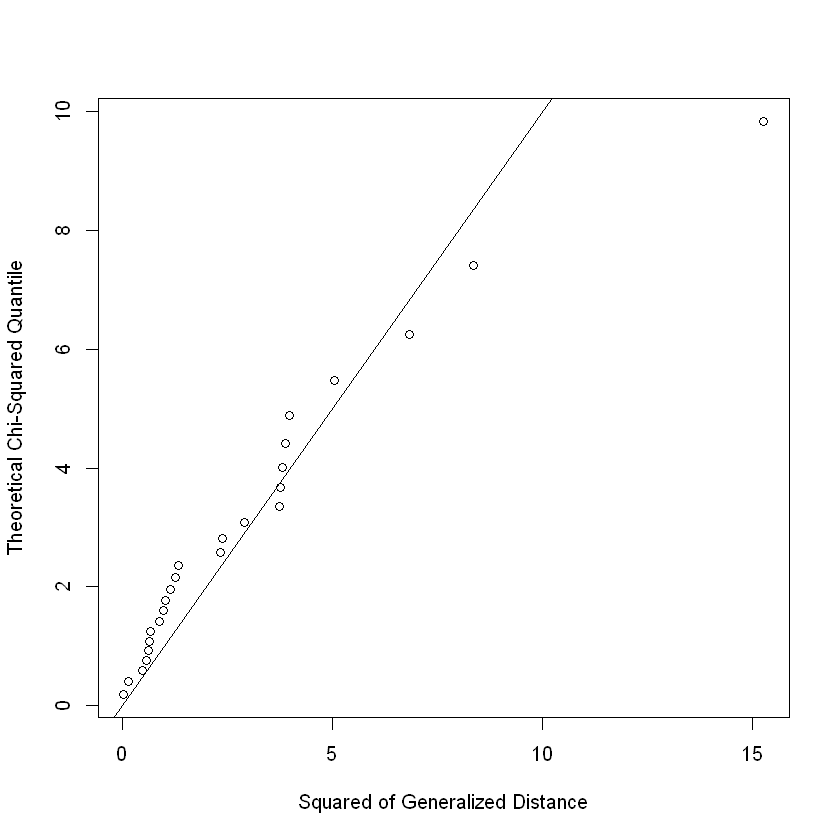

In [19]:
# utility function to calculate squared of generalized distance.

sqrDist <- function(X, i){
  
  library(matlib)
  X <- as.matrix(X)
    
  return(t(X[i, ]-colMeans(X)) %*% inv(cov(X)) %*% (X[i, ]-colMeans(X)))
}

# chisquare plot function
manualChisqPlot <- function(X){
  # number of obs
  n <- nrow(X)
  
  # number of variables
  p <- ncol(X)
  
  # initialize squared generalized distance vector
  dSqrd <- c()
  
  # compute squared generalized distance
  for(i in 1 : n){
    dSqrd <- c(dSqrd, sqrDist(X, i))
  }
  
  # empirical quantile
  empQuantile <- sort(dSqrd)
  
  # empirical CDF
  empCDF <- 1:n
  empCDF <- (empCDF - 0.5) / n
  
  # theoretical chi-squared quantile
  theoQuantile <- qchisq(empCDF, df = p)
  
  # plot
  plot( empQuantile, theoQuantile
       , ylab = "Theoretical Chi-Squared Quantile"
       , xlab = "Squared of Generalized Distance")
  
  # add y = x line
  abline(a = 0, b = 1)
  
  return(data.frame(list(Theoretical_Quantile = theoQuantile, Empirical_Quantile = empQuantile)))
}

a <- manualChisqPlot(data)

### Multivariate Normality Test

#### Univariate Normality

In [20]:
#Shapiro Wilk Test
unvrtTest <- function(X){

  # get the shapiro wilk test result
  unvrtTestResult <- as.data.frame(mvn(X, univariateTest = "SW")[2])
  unvrtTestResult <- unvrtTestResult[ , c(-5)]
  
  # change the column name
  colnames(unvrtTestResult) <- c( "Test", "Variable", "Statistic", "P_Value")#     

  return(unvrtTestResult)
}

kable(unvrtTest(data))



|Test         |Variable |Statistic |P_Value |
|:------------|:--------|:---------|:-------|
|Shapiro-Wilk |fuel     |0.8275    |0.0007  |
|Shapiro-Wilk |repair   |0.9258    |0.0697  |
|Shapiro-Wilk |capital  |0.9690    |0.6204  |

#### Using MVN Package

In [21]:
# function to do multivariate normality test
mvtNormalityTest <- function(X){
  library(MVN)
  
  # list of test that will be performed
  testList <- c("mardia", "hz", "royston", "dh", "energy")
  
  # initialize result dataframe
  result <- c()
  
  for(i in 1 : length(testList)){
    tempMvnObj <- mvn(X, mvnTest=testList[i])
    tempResult <- tempMvnObj[[1]] 
    
    # drop third column
    if(i == 4){
      tempResult <- tempResult[ , -3]
    }
    
    # drop "result" column
    tempResult <- tempResult[, -4]
    
    # convert to numeric
    tempResult[2] <- as.numeric(as.character(tempResult[[2]]))
    tempResult[3] <- as.numeric(as.character(tempResult[[3]]))
    
    colnames(tempResult) <- c("Test", "Statistic", "P_Value")
    
    result <- rbind(result, tempResult)
  }
  
  return(result) 
} 

kable(mvtNormalityTest(data))



|Test            |  Statistic|   P_Value|
|:---------------|----------:|---------:|
|Mardia Skewness | 31.0682232| 0.0005717|
|Mardia Kurtosis |  2.6001566| 0.0093181|
|MVN             |         NA|        NA|
|Henze-Zirkler   |  0.9913875| 0.0116026|
|Royston         | 16.2501889| 0.0010148|
|Doornik-Hansen  |  8.3736140| 0.2119889|
|E-statistic     |  1.3009415| 0.0060000|

#### Using RVAideMemoire Package

In [22]:
mshapiro.test(data)


	Multivariate Shapiro-Wilk normality test

data:  (fuel,repair,capital)
W = 0.77297, p-value = 8.32e-05


## Treatment for Multivariate Normal Assumption Violation

### Outlier Removal

In [23]:
data_eliminated <- data[-c(9, 21), ]

# function to compare multivariate test from 2 datasets
compareMvTest <- function(X1, X2){
  result1 <- mvtNormalityTest(X1)
  result2 <- mvtNormalityTest(X2)
  
  compareResult <- c()
  compareResult$Test <- result1$Test
  compareResult$Statistic1 <- result1$Statistic
  compareResult$Statistic2 <- result2$Statistic
  compareResult$P_Value1 <- result1$P_Value
  compareResult$P_Value2 <- result2$P_Value
  
  return( as.data.frame(compareResult) )
}

compareOutlier <- compareMvTest(data, data_eliminated)
colnames(compareOutlier) <- c("Test", "Statistic w/ Outlier", "Statistic w/o Outlier", "P_Value w/ Outlier", "P_Value w/o Outlier")

kable(compareOutlier)



|Test            | Statistic w/ Outlier| Statistic w/o Outlier| P_Value w/ Outlier| P_Value w/o Outlier|
|:---------------|--------------------:|---------------------:|------------------:|-------------------:|
|Mardia Skewness |           31.0682232|             8.0414351|          0.0005717|           0.6247895|
|Mardia Kurtosis |            2.6001566|            -0.3409381|          0.0093181|           0.7331502|
|MVN             |                   NA|                    NA|                 NA|                  NA|
|Henze-Zirkler   |            0.9913875|             0.6247986|          0.0116026|           0.3532378|
|Royston         |           16.2501889|             4.3196577|          0.0010148|           0.2389119|
|Doornik-Hansen  |            8.3736140|             4.9700577|          0.2119889|           0.5476592|
|E-statistic     |            1.3009415|             0.8615430|          0.0030000|           0.3340000|

### Transformation

In [24]:
# Apply logarithm transformation to fuel

data_transformed <- data
data_transformed$Log_Fuel <- log(data_transformed$fuel)
data_transformed$Log_Repair <- log(data_transformed$repair)

kable(unvrtTest(data_transformed))



|Test         |Variable   |Statistic |P_Value |
|:------------|:----------|:---------|:-------|
|Shapiro-Wilk |fuel       |0.8275    |0.0007  |
|Shapiro-Wilk |repair     |0.9258    |0.0697  |
|Shapiro-Wilk |capital    |0.9690    |0.6204  |
|Shapiro-Wilk |Log_Fuel   |0.9460    |0.2034  |
|Shapiro-Wilk |Log_Repair |0.9418    |0.1628  |

In [25]:
compareTransformed <- compareMvTest(data, data_transformed[ , c(3, 4, 5)])
colnames(compareTransformed) <- c("Test", "Stat. Original", "Stat. Transformed"
                                  , "P_Value Original", "P_Value Transformed")
kable(compareTransformed)



|Test            | Stat. Original| Stat. Transformed| P_Value Original| P_Value Transformed|
|:---------------|--------------:|-----------------:|----------------:|-------------------:|
|Mardia Skewness |     31.0682232|        20.5375992|        0.0005717|           0.0245589|
|Mardia Kurtosis |      2.6001566|         2.0269298|        0.0093181|           0.0426696|
|MVN             |             NA|                NA|               NA|                  NA|
|Henze-Zirkler   |      0.9913875|         0.6601969|        0.0116026|           0.2907259|
|Royston         |     16.2501889|         5.2257245|        0.0010148|           0.1599251|
|Doornik-Hansen  |      8.3736140|        47.2219904|        0.2119889|           0.0000000|
|E-statistic     |      1.3009415|         0.9342234|        0.0000000|           0.1860000|

# Pertemuan 4

## Uji Hipotesis

### Load Data

In [26]:
# manually 1.0

y1 <- c(51, 27, 37, 42, 27, 43, 41, 38, 36, 26, 29)
y2 <- c(36, 20, 22, 36, 18, 32, 22, 21, 23, 31, 20)
y3 <- c(50, 26, 41, 32, 33, 43, 36, 31, 27, 31, 25)
y4 <- c(35, 17, 37, 34, 14, 35, 25, 20, 25, 32, 26)
y5 <- c(42, 27, 30, 27, 29, 40, 38, 16, 28, 36, 25)

data <- data.frame(y1, y2, y3, y4, y5)
data

y1,y2,y3,y4,y5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
51,36,50,35,42
27,20,26,17,27
37,22,41,37,30
42,36,32,34,27
27,18,33,14,29
43,32,43,35,40
41,22,36,25,38
38,21,31,20,16
36,23,27,25,28


### Hipotesis

$$
H_{0} : \mu' = (30, 25, 40, 25, 30) \\
H_{1} : \mu' \neq (30, 25, 40, 25, 30) \\
\alpha = 0.05
$$

### Statistik Uji

$$
T^2 = n(\bar{X}-\mu_0)'S^{-1}(\bar{X}-\mu_0)
$$
dimana
$$
T^2 \sim \frac{(n-1)p}{n-p}F(p, n-p)
$$

Tolak $H_0$ apabila

$$
T^2 > \frac{(n-1)p}{n-p}F(p, n-p);\alpha = 36.56145
$$

atau

$$
p-value = P[T^2 >T^2_{obs}] < \alpha 
$$

### Uji Asumsi Multivariat Normal

In [27]:
# function to do multivariate normality test
mvtNormalityTest <- function(X){
  
  # list of test that will be performed
  testList <- c("mardia", "hz", "royston", "dh", "energy")
  
  # initialize result dataframe
  result <- c()
  
  for(i in 1 : length(testList)){
    tempMvnObj <- mvn(X, mvnTest=testList[i])
    tempResult <- tempMvnObj[[1]] 
    
    # drop third column
    if(i == 4){
      tempResult <- tempResult[ , -3]
    }
    
    # drop "result" column
    tempResult <- tempResult[, -4]
    
    # convert to numeric
    tempResult[2] <- as.numeric(as.character(tempResult[[2]]))
    tempResult[3] <- as.numeric(as.character(tempResult[[3]]))
    
    colnames(tempResult) <- c("Test", "Statistic", "P_Value")
    result <- rbind(result, tempResult)
  }
  
  # also do shapiro test
  tempResult <- c("Mvt Shapiro-Wilk", mshapiro.test(X)$statistic
                  , mshapiro.test(X)$p.value)
  
  result <- rbind(result, tempResult)
  return(result)
} 

mvtNormalityTest(data)

Test,Statistic,P_Value
<chr>,<chr>,<chr>
Mardia Skewness,33.0537767741313,0.562343505621464
Mardia Kurtosis,-1.17501697445706,0.239987924813936
MVN,NA,NA
Henze-Zirkler,0.755710518115649,0.349135306055726
Royston,8.11951719431442,0.17381983003797
Doornik-Hansen,7.34759588802618,0.692272555425496
E-statistic,1.04843793191075,0.642
Mvt Shapiro-Wilk,0.728025201334773,0.00107625976455569


### Uji Hotelling's T

In [28]:
# function to do Hotelling's T test of mean vector

T.test <- function(X, mu0, alpha){
  
  X <- as.matrix(X)
  
  # get number of obs and number of var
  n <- nrow(X)
  p <- ncol(X)
  
  # dof
  df1 <- p
  df2 <- n-p
  
  # check if df2 < 1L
  if(df2 < 1L) stop("Need nrow(X) > ncol(X)")
  
  # get sample mean vector
  Xbar <- colMeans(X)
  
  # get covariance matrix
  S <- cov(X)
  
  # get T-statistic
  T_statistic <- n*t(Xbar-mu0)%*%solve(S)%*%(Xbar-mu0)
  
  # get p_value
  p_val <- pf(T_statistic/((n-1)*p/(n-p)), df1, df2, lower.tail = FALSE)
  
  # get critical value
  critValue <- (n-1)*p/(n-p)*qf(alpha, df1, df2, lower.tail=F)
  
  # output table
  tabel <- data.frame(Hotelling_Stat = T_statistic, alpha = alpha, Critical_Value = critValue,
                      df1 = df1, df2 = df2, P_Value = p_val
  )
  
  return(tabel)
}

kable(T.test(data, c(30, 25, 40, 25, 30), 0.05))



| Hotelling_Stat| alpha| Critical_Value| df1| df2|   P_Value|
|--------------:|-----:|--------------:|---:|---:|---------:|
|        85.3327|  0.05|       36.56145|   5|   6| 0.0066995|

Berdasarkan hasil pengujian Hotelling's T diatas, terlihat bahwa $T^2_{obs} =85.3 > 36.5$ , atau $p-value = 0.00669 < \alpha =0.05$, sehingga tolak $H_0$ . Dengan demikian untuk tingkat signifikansi 5% *true mean vector* memiliki perbedaan yang signifikan terhadap *hypothesized mean vector*.

### Uji setiap Variabel secara Parsial

In [29]:
mu0 <- c(30, 25, 40, 25, 30)

partialTest <- function(X, mu0){
  
  result <- c()
  
  for(i in 1 : ncol(X)){
    tempObj <- t.test(X[ , i], mu = mu0[i], alternative="two.sided")
    tempResult <- c(colnames(X)[i], mean(X[ , i]), mu0[i], tempObj$p.value)
    result <- rbind(result, tempResult)
  }
  
  result <- as.data.frame(result)
  rownames(result) <- NULL
  colnames(result) <- c("Variable", "xbar", "mu0", "p-value")
  return(result)
}

kable(partialTest(data, mu0))



|Variable |xbar             |mu0 |p-value            |
|:--------|:----------------|:---|:------------------|
|y1       |36.0909090909091 |30  |0.0312370094540684 |
|y2       |25.5454545454545 |25  |0.795252321811278  |
|y3       |34.0909090909091 |40  |0.030613223170088  |
|y4       |27.2727272727273 |25  |0.364001465726463  |
|y5       |30.7272727272727 |30  |0.758404311499598  |

Berdasarkan hasil pengujian diatas, terlihat bahwa untuk tingkat signifikansi 5%, terdapat perbedaan yang signifikan antara nilai rata-rata sebenarnya dari variabel y1 dan y3 terhadap nilai rata-rata yang dihipotesiskan, akan tetapi perbedaan ini tidak signifikan pada variabel-variabel lainnya.

## Uji Hipotesis

### Load Data

In [30]:
# manually 1.0

X1 <- c(468,428,514,547,614,501,421,527,527,620,587,541,561,468,614,527,507,580,507,521,574,587,488,488,587,421,481,428,640,574,547,580,494,554,647,507,454,427,521,468,587,507,574,507,494,541,362,408,594,501,687,633,647,647,614,633,448,408,441,435,501,507,620,415,554,348,468,507,527,527,435,660,733,507,527,428,481,507,527,488,607,561,614,527,474,441,607)
X2 <- c(41,39,53,67,61,67,46,50,55,72,63,59,53,62,65,48,32,64,59,54,52,64,51,62,56,38,52,40,65,61,64,64,53,51,58,65,52,57,66,57,55,61,54,53,41,47,36,28,68,25,75,52,67,65,59,65,55,51,35,60,54,42,71,52,69,28,49,54,47,47,50,70,73,45,62,37,48,61,66,41,69,59,70,49,41,47,67)
X3 <- c(26,26,21,33,27,29,22,23,19,32,31,19,26,20,28,21,27,21,21,23,25,31,27,18,26,16,26,19,25,28,27,28,26,21,23,23,28,21,26,14,30,31,31,23,24,25,17,17,23,26,33,31,29,34,25,28,24,19,22,20,21,24,36,20,30,18,25,26,31,26,28,25,33,28,29,19,23,19,23,28,28,34,23,30,16,26,32)

data <- data.frame(X1, X2, X3)
data

X1,X2,X3
<dbl>,<dbl>,<dbl>
468,41,26
428,39,26
514,53,21
547,67,33
614,61,27
501,67,29
421,46,22
527,50,23
527,55,19


### Hipotesis

$$
H_{0} : \mu' = (500, 50, 30) \\
H_{1} : \mu' \neq (500, 50, 30) \\
\alpha = 0.05
$$

### Statistik Uji

$$
T^2 = n(\bar{X}-\mu_0)'S^{-1}(\bar{X}-\mu_0)
$$
dimana
$$
T^2 \sim \frac{(n-1)p}{n-p}F(p, n-p)
$$

Tolak $H_0$ apabila

$$
T^2 > \frac{(n-1)p}{n-p}F(p, n-p);\alpha 
$$

atau

$$
p-value = P[T^2 >T^2_{obs}] < \alpha 
$$

In [31]:
mu0 <- c(500, 50, 30)
kable(T.test(data, mu0, 0.05))



| Hotelling_Stat| alpha| Critical_Value| df1| df2| P_Value|
|--------------:|-----:|--------------:|---:|---:|-------:|
|       223.3102|  0.05|       8.333483|   3|  84|       0|

Terlihat bahwa untuk tingkat signifikansi 5% terdapat perbedaan yang signifikan antara nilai vektor rata-rata yang sebenarnya dan nilai vektor rata-rata yang dihipotesiskan.

### 95% Confidence Ellipsoid

In [32]:
idk

ERROR: Error in eval(expr, envir, enclos): object 'idk' not found


Terlihat bahwa $\mu_0$ berada pada 95% *ellipsoid*, dalam artian lain gagal tolak $H_0$.

### Simultaneous 95% CI

#### Define function

In [34]:
t.univ <- function(X, alpha){

  n <- nrow(X)
  p <- ncol(X)
  xbar <- colMeans(X)
  S <- cov(X)
  critValue <- qt(alpha/2, df = n-1, lower.tail=F)
  
  CI <- c()
  
  for(i in 1 : p){
    
    standardError <- sqrt(S[i, i] / n)
    
    Upper <- xbar[i] +  critValue*standardError
    Lower <- xbar[i] -  critValue*standardError
    
    CI <- rbind(CI, c(colnames(X)[i], Lower, Upper))
  }
  
  CI <- as.data.frame(CI)
  colnames(CI) <- c("Variable", "Lower_t", "Upper_t")
  
  return(CI) 
}

In [35]:
Hotelling <- function(X, alpha){
  
  n <- nrow(X)
  p <- ncol(X)
  xbar <- colMeans(X)
  S <- cov(X)
  critValue <- sqrt((n-1)*p/(n-p) * qf(alpha, df1 = p, df2 = n-p, lower.tail = F))
  
  CI <- c()
  
  for(i in 1 : p){
    
    standardError <- sqrt(S[i, i] / n)
    
    Upper <- xbar[i] +  critValue*standardError
    Lower <- xbar[i] -  critValue*standardError
    
    CI <- rbind(CI, c(colnames(X)[i], Lower, Upper))
  }
  
  CI <- as.data.frame(CI)
  colnames(CI) <- c("Variable", "Lower_Hotelling", "Upper_Hotelling")
  
  return(CI)
} 

In [36]:
bonferroni <- function(X, alpha){
  
  n <- nrow(X)
  p <- ncol(X)
  xbar <- colMeans(X)
  S <- cov(X)
  critValue <- qt(alpha/ 2*p, df=n-1, lower.tail=F)
  
  CI <- c()
  
  for(i in 1 : p){
    
    standardError <- sqrt(S[i, i] / n)
    
    Upper <- xbar[i] +  critValue*standardError
    Lower <- xbar[i] -  critValue*standardError
    
    CI <- rbind(CI, c(colnames(X)[i], Lower, Upper))
  }
  
  CI <- as.data.frame(CI)
  colnames(CI) <- c("Variable", "Lower_Bonferroni", "Upper_Bonferroni")
  
  return(CI)
}

#### Result

In [38]:
simultCI <- function(X, alpha){
  result <- t.univ(X, alpha)
  result <- cbind(result, Hotelling(X, alpha)[-1])
  result <- cbind(result, bonferroni(X, alpha)[-1])
  return(result)  
}

kable(simultCI(data, 0.05))



|Variable |Lower_t          |Upper_t          |Lower_Hotelling  |Upper_Hotelling  |Lower_Bonferroni |Upper_Bonferroni |
|:--------|:----------------|:----------------|:----------------|:----------------|:----------------|:----------------|
|X1       |510.343518871643 |542.828894921461 |502.999398366498 |550.173015426605 |514.718312522639 |538.454101270464 |
|X2       |52.296778977941  |57.0825313668866 |51.2148416102374 |58.1644687345902 |52.9412744929165 |56.4380358519111 |
|X3       |24.1018266325808 |26.1510469306376 |23.6385498403578 |26.6143237228606 |24.3777943768262 |25.8750791863922 |

### 4

####  Marginal QQ Plot

[1] 73 66

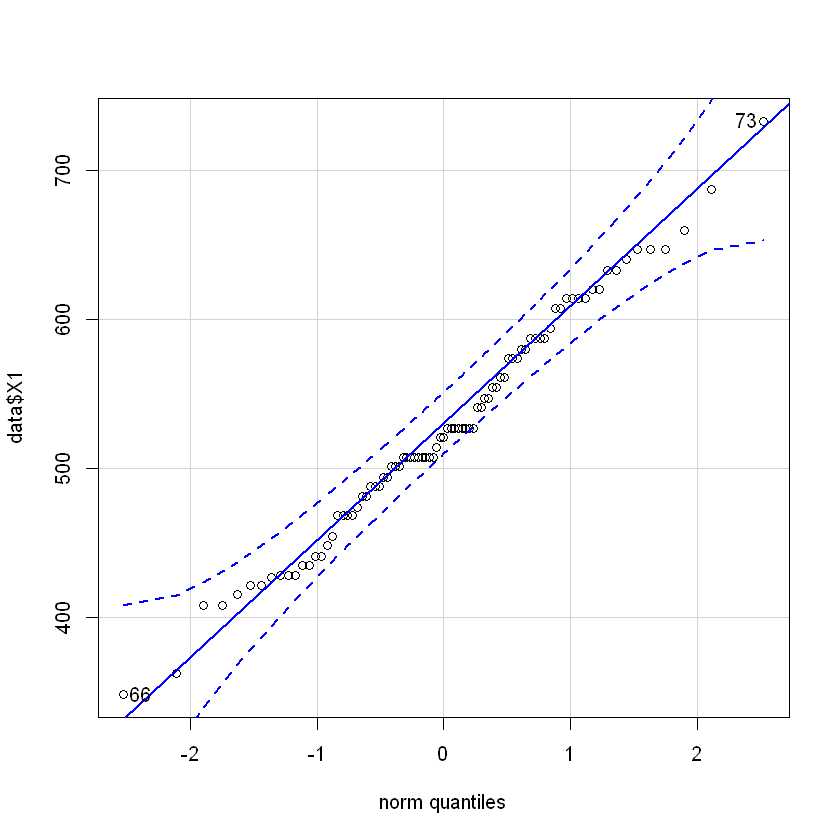

[1] 50 48

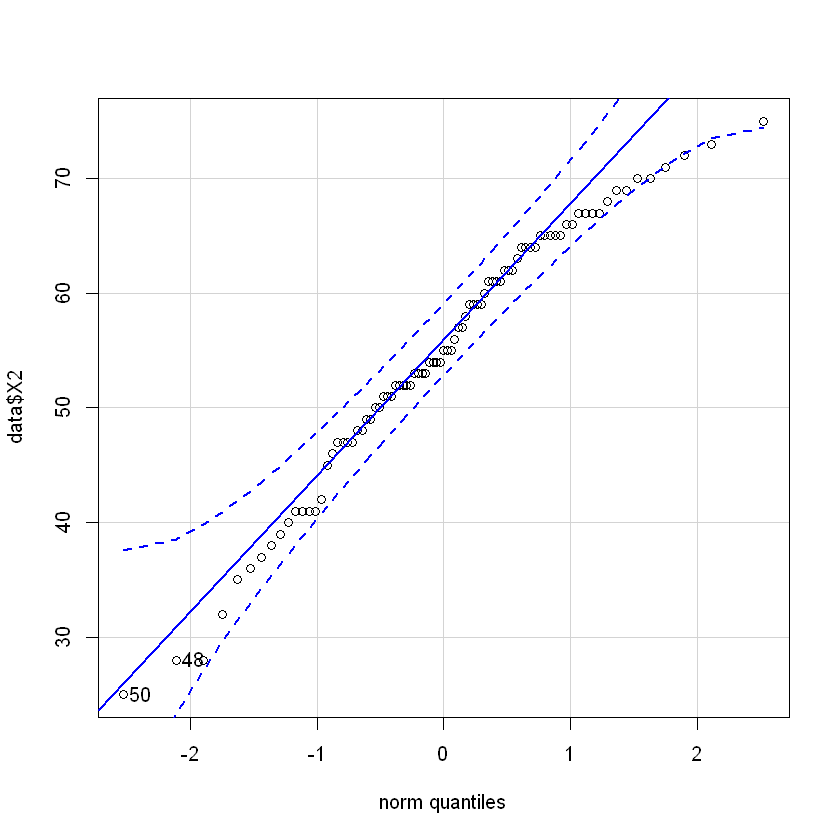

[1] 40 63

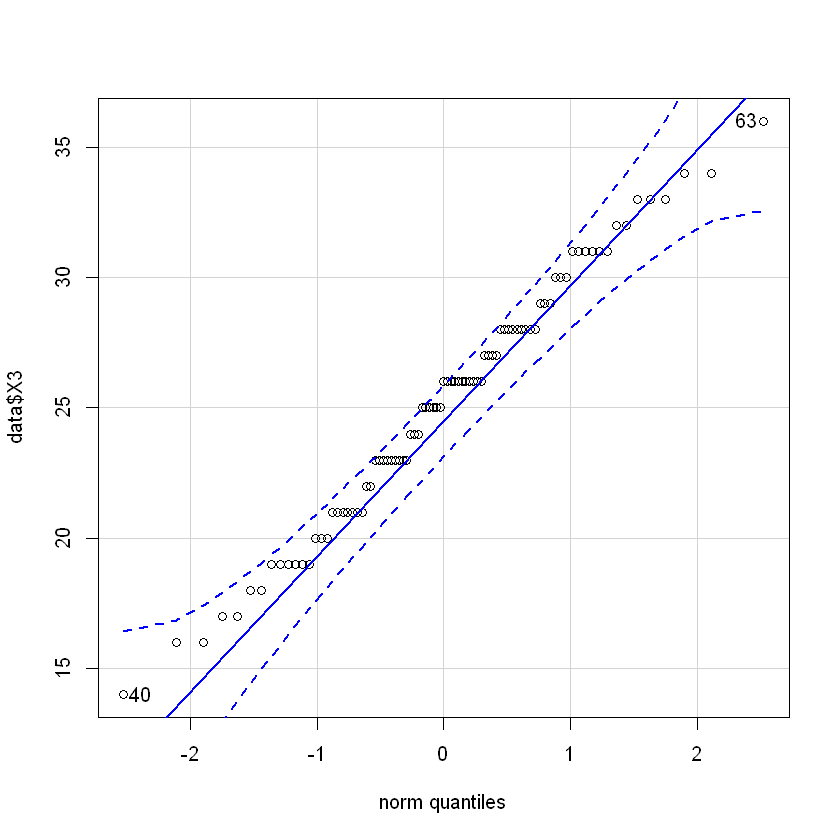

In [39]:
qqPlot(data$X1)
qqPlot(data$X2)
qqPlot(data$X3)

Berdasarkan marginal QQ Plot diatas, terlihat bahwa ketiga variabel telah berdistribusi univariate normal secara marginal, dan masih terdapat beberapa outlier univariat di ketiga variabel.

#### Bivariate Scatterplot

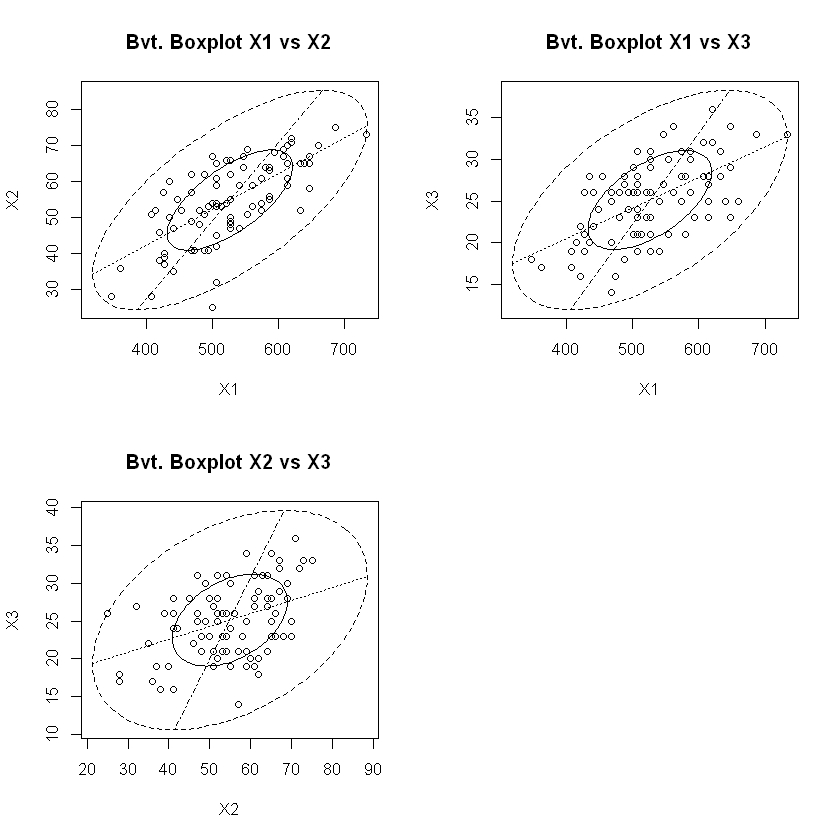

In [43]:
# set plot display parameter
par(mfrow = c(2, 2)) # Create a 2 x 2 plotting matrix
mat <- matrix(c(1, 2, 3, 0), nrow=2, byrow=T)
layout(mat)

data_mat <- as.matrix(data)

# bivariate scatterplot with confidence area
bvbox(data_mat[,c(1, 2)], xlab = "X1", ylab = "X2", main = "Bvt. Boxplot X1 vs X2")

bvbox(data_mat[,c(1, 3)], xlab = "X1", ylab = "X3", main = "Bvt. Boxplot X1 vs X3")

bvbox(data_mat[,c(2, 3)], xlab = "X2", ylab = "X3", main = "Bvt. Boxplot X2 vs X3")

Berdasarkan scatterplot + bivariate boxplot diatas, tidak terdapat outlier bivariat dari setiap kombinasi pasangan variabel dari dataset yg digunakan.

#### Chi-Square Plot

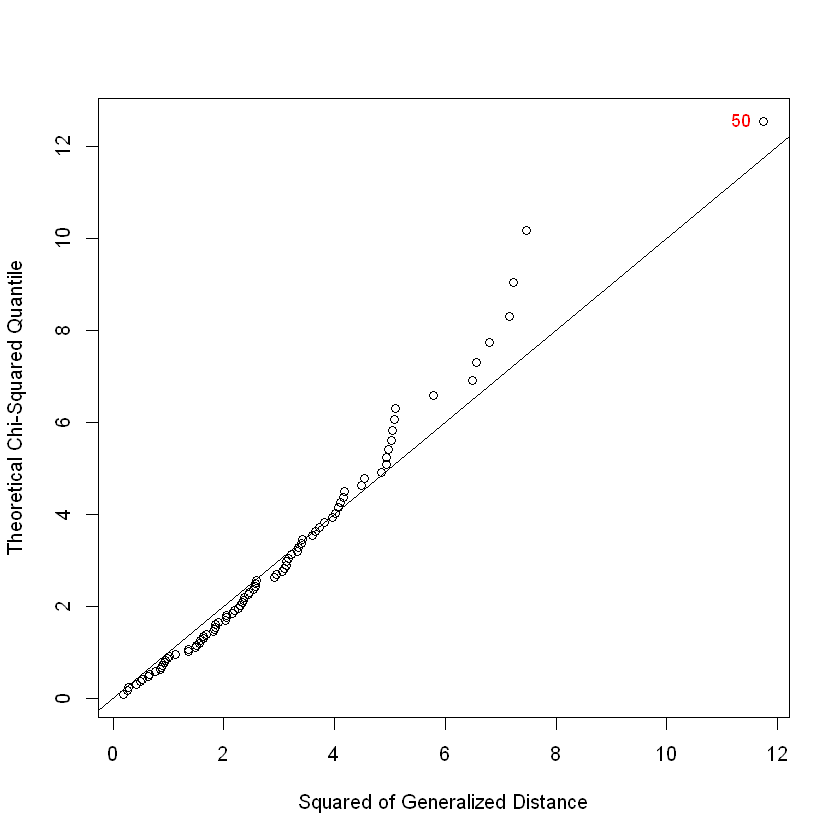

In [45]:
# utility function to calculate squared of generalized distance.

sqrDist <- function(X, i){
   
  X <- as.matrix(X)
  
  return(t(X[i, ]-colMeans(X)) %*% inv(cov(X)) %*% (X[i, ]-colMeans(X)))
}

manualChisqPlot <- function(X){
  
  n <- nrow(X)
  p <- ncol(X)
  
  # initialize squared generalized distance vector
  dSqrd <- c()
  
  # compute squared generalized distance
  for(i in 1 : n){
    dSqrd <- c(dSqrd, sqrDist(X, i))
  }
  
  # empirical quantile
  empQuantile <- sort(dSqrd)
  
  # empirical CDF
  empCDF <- 1:n
  empCDF <- (empCDF - 0.5) / n
  
  # theoretical chi-squared quantile
  theoQuantile <- qchisq(empCDF, df = p)
  
  # plot
  plot( empQuantile, theoQuantile
       , ylab = "Theoretical Chi-Squared Quantile"
       , xlab = "Squared of Generalized Distance")
  
  # add y = x line
  abline(a = 0, b = 1)
  
  return(data.frame(list(Theoretical_Quantile = theoQuantile, Empirical_Quantile = empQuantile)))
}

chisqplot <- manualChisqPlot(data)
text(chisqplot$Empirical_Quantile[87], chisqplot$Theoretical_Quantile[87], labels="50", cex = 0.9, pos = 2, col = "red")

Berdasarkan Chi-Squared Plot diatas terlihat bahwa mayoritas observasi jatuh pada garis y = x (dimana x adalah *empirical quantile* dan y adalah *theoretical chisquare quantile*) yang mengindikasikan bahwa data tersebut berdistribusi multivariate normal. Kemudian juga terlihat bahwa observasi ke-50 cenderung sangat jauh dibandingkan observasi yang lainnya yang dapat menjadi pertanda *outlier*.

#### Apakah Hasil Konsisten?

Berdasarkan uji vektor rata-rata menggunakan statistik *Hotelling's T* diperoleh keputusan **tolak** $H_0$. Berdasarkan 95% *confidence ellipsoid* diperoleh keputusan **gagal tolak** $H_0$. Kemudian berdasarkan *simultaneous* 95% *confidence interval*, baik menggunakan t.univariate, Hotelling's, maupun Bonferroni, diperoleh keputusan **tolak H0**.

### Uji Multivariate Normal Sebelum dan Setelah Outlier Dibuang

In [48]:
data_eliminated <- data[-c(50), ]

# function to compare multivariate test from 2 datasets
compareMvTest <- function(X1, X2){
  result1 <- mvtNormalityTest(X1)
  result2 <- mvtNormalityTest(X2)
  
  compareResult <- c()
  compareResult$Test <- result1$Test
  compareResult$Statistic1 <- result1$Statistic
  compareResult$Statistic2 <- result2$Statistic
  compareResult$P_Value1 <- result1$P_Value
  compareResult$P_Value2 <- result2$P_Value
  
  return(as.data.frame(compareResult))
}

compareOutlier <- compareMvTest(data, data_eliminated)
colnames(compareOutlier) <- c("Test", "Statistic w/ Outlier", "Statistic w/o Outlier", "P_Value w/ Outlier", "P_Value w/o Outlier")

kable(compareOutlier)



|Test             |Statistic w/ Outlier |Statistic w/o Outlier |P_Value w/ Outlier   |P_Value w/o Outlier  |
|:----------------|:--------------------|:---------------------|:--------------------|:--------------------|
|Mardia Skewness  |10.1071534211083     |7.0207812397471       |0.431143218437203    |0.723481631347079    |
|Mardia Kurtosis  |-1.60043235277132    |-2.1269459472045      |0.109502702708812    |0.0334245745862802   |
|MVN              |NA                   |NA                    |NA                   |NA                   |
|Henze-Zirkler    |0.616550897136643    |0.655252900355685     |0.723549796427021    |0.613217506914146    |
|Royston          |4.76923107733215     |3.77045783799917      |0.18597105511583     |0.279656597211519    |
|Doornik-Hansen   |444.976327626128     |342.24355308605       |5.91705929341311e-93 |7.13531280985995e-71 |
|E-statistic      |0.779493217846894    |0.801407930982647     |0.668                |0.579                |
|Mvt Shapiro-Wilk

Penghapusan *outlier* tidak mengubah kesimpulan awal, yaitu untuk tingkat signifikansi belum terdapat cukup bukti atas penyimpangan terhadap distribusi multivariate normal dari data yang digunakan.

# Pertemuan 5

## Paired Comparison

### Load Data

In [50]:
# manually 1.0

data <- data.frame(
  BOD_commercial = c(6, 6, 18, 8, 11, 34, 28, 71, 43, 33, 20)
  , SS_commercial = c(27, 23, 64, 44, 30, 75, 26, 124, 54, 30, 14)
  , BOD_state = c(25, 28, 36, 35, 15, 44, 42, 54, 34, 29, 39)
  , SS_state = c(15, 13, 22, 29, 31, 64, 30, 64, 56, 20, 21)
)
data

BOD_commercial,SS_commercial,BOD_state,SS_state
<dbl>,<dbl>,<dbl>,<dbl>
6,27,25,15
6,23,28,13
18,64,36,22
8,44,35,29
11,30,15,31
34,75,44,64
28,26,42,30
71,124,54,64
43,54,34,56


In [ ]:
# using url github

url<-"https://raw.githubusercontent.com/rii92/tugas-APG/main/20%20Maret%202022/APG_dataNo_6.1.csv"
data <- read.csv(url)
data

In [53]:
data_dif <- data.frame(
  dBOD = data1$BOD_state - data1$BOD_commercial,
  dSS = data1$SS_state - data1$SS_commercial
)
library(knitr)
kable(data_dif)



| dBOD| dSS|
|----:|---:|
|   19| -12|
|   22| -10|
|   18| -42|
|   27| -15|
|    4|   1|
|   10| -11|
|   14|   4|
|  -17| -60|
|   -9|   2|
|   -4| -10|
|   19|   7|

### Real Data

#### 95% Confidence Ellipse

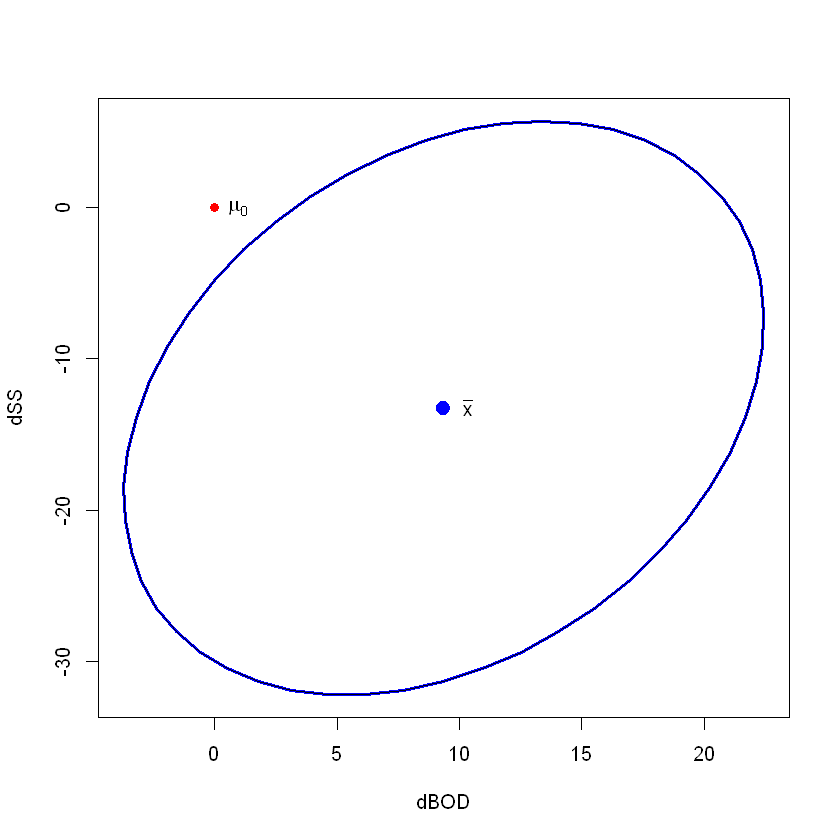

In [54]:
ellipseCI <- function(X, alpha, mu){
  n <- nrow(X)
  p <- ncol(X)
  xbar <- colMeans(X)
  S <- cov(X)
  
  library(car)
  
  tconst <- sqrt(
    (p/n)*((n-1)/(n-p)) * qf(1-alpha,p,n-p)
    )
  
  plot(ellipse(
    center = xbar , shape = S, radius=tconst, draw = F)
    , type="n", xlab="dBOD", ylab="dSS")
  
  lines(ellipse(center=xbar, shape=S, radius=tconst, lwd= 3), xlab = "dBOD", ylab="dSS")
  
  points(mu[1], mu[2], col="red", pch=16)
  text(mu[1]+1, mu[2],expression(mu[0])) 
  text(xbar[1]+1,xbar[2],expression(bar(x)))
  
}

ellipseCI(data_dif, 0.05, c(0, 0))

Terlihat bahwa titik $\vec \mu_0 = [0, 0]^T$ berada diluar 95% *confidence ellipse.* Hal ini mengimplikasikan keberhasilan dalam menolak $H_0$ untuk taraf uji 5%. Hasil ini konsisten dengan uji $T^2$ pada *example* 6.1.

#### 95% Bonferroni Simultaneous Interval

In [55]:
bonferroni <- function(X, alpha){
  
  n <- nrow(X)
  p <- ncol(X)
  xbar <- colMeans(X)
  S <- cov(X)
  critValue <- qt(alpha/ 2*p, df=n-1, lower.tail=F)
  
  CI <- c()
  
  for(i in 1 : p){
    
    ## get standard error
    standardError <- sqrt(S[i, i] / n)
    
    Upper <- xbar[i] +  critValue*standardError
    Lower <- xbar[i] -  critValue*standardError
    
    CI <- rbind(CI, c(colnames(X)[i], Lower, Upper))
  }
  
  CI <- as.data.frame(CI)
  colnames(CI) <- c("Variable", "Lower_Bonferroni", "Upper_Bonferroni")
  
  return(CI)
}

kable(bonferroni(data_dif, 0.05))



|Variable |Lower_Bonferroni  |Upper_Bonferroni  |
|:--------|:-----------------|:-----------------|
|dBOD     |1.64969246763455  |17.0775802596382  |
|dSS      |-24.4537466652534 |-2.09170788020114 |

Terlihat bahwa panjang 95% *confidence interval* Bonferroni untuk kedua *difference* lebih pendek dibandingkan Hotelling's pada *example 6.1*.

### Outlier Removed

#### Outlier Removal

In [57]:
data_dif_noOut <- data_dif[-8 , ]

#### Uji Hotelling's T

In [58]:
T.test <- function(X, mu0, alpha){
  
  X <- as.matrix(X)
  
  # get number of obs and number of var
  n <- nrow(X)
  p <- ncol(X)
  
  # dof
  df1 <- p
  df2 <- n-p
  
  # check if df2 < 1L
  if(df2 < 1L) stop("Need nrow(X) > ncol(X)")
  
  # get sample mean vector
  Xbar <- colMeans(X)
  
  # get covariance matrix
  S <- cov(X)
  
  # get T-statistic
  T_statistic <- n*t(Xbar-mu0)%*%solve(S)%*%(Xbar-mu0)
  
  # get p_value
  p_val <- pf(
    T_statistic/((n-1)*p/(n-p))
    , df1, df2
    , lower.tail = FALSE
    )
  
  # get critical value
  critValue <- (n-1)*p/(n-p)*qf(alpha, df1, df2, lower.tail=F)
  
  # output table
  tabel <- data.frame(
    Hotelling_Stat = T_statistic
    , alpha = alpha
    , Critical_Value = critValue
    , df1 = df1
    , df2 = df2
    , P_Value = p_val
  )
  
  return(tabel)
}

kable(T.test(data_dif_noOut, c(0,0), 0.05))



| Hotelling_Stat| alpha| Critical_Value| df1| df2|   P_Value|
|--------------:|-----:|--------------:|---:|---:|---------:|
|       11.44652|  0.05|       10.03268|   2|   8| 0.0375398|

Penghilangan *outlier* tetap menghasilkan uji Hotelling's T yang tolak $H_0$ untuk taraf uji 5%.

#### 95% Confidence Region

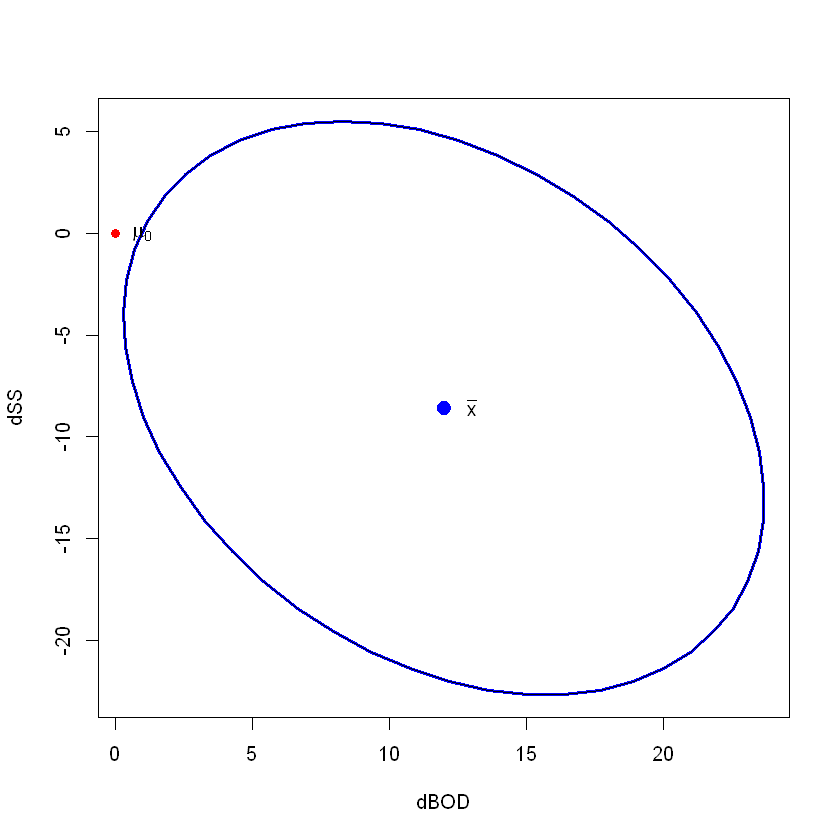

In [59]:
ellipseCI(data_dif_noOut, 0.05, c(0, 0))

95% *confidence region* yang diperoleh konsisten dengan hasil pengujian sebelumnya, yaitu titik $\vec \mu = [0, 0]^T$ yang diluar elips mengimplikasikan hasil uji yang tolak $H_0$

#### 95% Bonferroni Simultaneous CI

In [60]:
bonferroni(data_dif_noOut, 0.05)

Variable,Lower_Bonferroni,Upper_Bonferroni
<chr>,<chr>,<chr>
dBOD,5.22877648236938,18.7712235176306
dSS,-16.762328586457,-0.437671413542992


Selang kepercayaan 95% simultan bonferroni juga memberikan hasil yang konsisten, yaitu semua selang kepercayaan marginal tidak mencakup nilai 0, sehingga tolak $H_0$

### Transformasi Log

#### Data

In [62]:
# log transforamtion
data_log <- data.frame(
  logBOD_commercial = log(data$BOD_commercial)
  , logBOD_state = log(data$BOD_state)
  , logSS_commercial = log(data$SS_commercial)
  , logSS_state = log(data$SS_state)
)

# difference of log
data_log_dif <- data.frame(
  dLogBOD = data_log$logBOD_state - data_log$logBOD_commercial
  , dLogSS = data_log$logSS_state - data_log$logSS_commercial
)

kable(data_log_dif)



|    dLogBOD|     dLogSS|
|----------:|----------:|
|  1.4271164| -0.5877867|
|  1.5404450| -0.5705449|
|  0.6931472| -1.0678406|
|  1.4759065| -0.4168938|
|  0.3101549|  0.0327898|
|  0.2578291| -0.1586050|
|  0.4054651|  0.1431008|
| -0.2736958| -0.6613985|
| -0.2348396|  0.0363676|
| -0.1292117| -0.4054651|
|  0.6678294|  0.4054651|

#### Uji Hotelling's T

In [64]:
kable(T.test(data_log_dif, c(0, 0), 0.05))



| Hotelling_Stat| alpha| Critical_Value| df1| df2|   P_Value|
|--------------:|-----:|--------------:|---:|---:|---------:|
|       10.21541|  0.05|       9.458877|   2|   9| 0.0421141|

Untuk taraf uji 5%, diperoleh hasil tolak $H_0$. Hal ini mengimplikasikan adanya perbedaan yang signifikan pada setidaknya salah satu selisih dari logaritma BOD ataupun SS.

#### 95% Hotelling's Simultaneous Confidence Interval

In [65]:
Hotelling <- function(X, alpha){
  
  # get n 
  n <- nrow(X)
  
  # get p
  p <- ncol(X)
  
  # sample mean vector
  xbar <- colMeans(X)
  
  # get covariance matrix
  S <- cov(X)
  
  # get critical value
  critValue <- sqrt(
    (n-1)*p/(n-p) * qf(alpha, df1 = p, df2 = n-p, lower.tail = F)
  )
  
  CI <- c()
  
  for(i in 1 : p){
    
    ## get standard error
    standardError <- sqrt(S[i, i] / n)
    
    Upper <- xbar[i] +  critValue*standardError
    Lower <- xbar[i] -  critValue*standardError
    
    CI <- rbind(CI, c(colnames(X)[i], Lower, Upper))
  }
  
  CI <- as.data.frame(CI)
  colnames(CI) <- c("Variable", "Lower_Hotelling", "Upper_Hotelling")
  
  return(CI)
} 

kable(Hotelling(data_log_dif, 0.05))



|Variable |Lower_Hotelling     |Upper_Hotelling   |
|:--------|:-------------------|:-----------------|
|dLogBOD  |-0.0680501029019922 |1.18444036875874  |
|dLogSS   |-0.693155355710334  |0.102098781330273 |

Berdasarkan selang kepercayaan 95% simultan Hotelling, diperoleh hasil yang tidak konsisten terhadap pengujian sebelumnya, yaitu kedua selang kepercayaan marginal mengandung nilai 0, yang mengimplikasikan kegagalan dalam menolak $H_0$.

#### 95% Bonferroni Simultaneous Confidence Interval

In [66]:
kable(bonferroni(data_log_dif, 0.05))



|Variable |Lower_Bonferroni   |Upper_Bonferroni    |
|:--------|:------------------|:-------------------|
|dLogBOD  |0.189138222545918  |0.927252043310832   |
|dLogSS   |-0.529856644511517 |-0.0611999298685445 |

Selang kepercayaan 95% bonferroni yang diperoleh menunjukkan indikasi keberhasilan penolakan $H_0$, karena semua selang kepercayaan marginal tidak mengandung 0.

#### Uji Asumsi Multivariat Normal

In [67]:
mvtNormalityTest <- function(X){
  
  # list of test that will be performed
  testList <- c("mardia", "hz", "royston", "dh", "energy")
  
  # initialize result dataframe
  result <- c()
  
  for(i in 1 : length(testList)){
    tempMvnObj <- mvn(X, mvnTest=testList[i])
    tempResult <- tempMvnObj[[1]] 
    
    # drop third column
    if(i == 4){
      tempResult <- tempResult[ , -3]
    }
    
    # drop "result" column
    tempResult <- tempResult[, -4]
    
    # convert to numeric
    tempResult[2] <- as.numeric(as.character(tempResult[[2]]))
    tempResult[3] <- as.numeric(as.character(tempResult[[3]]))
    
    colnames(tempResult) <- c("Test", "Statistic", "P_Value")
    
    result <- rbind(result, tempResult)
  }
  
  # also do shapiro test
  library(RVAideMemoire)
  tempResult <- c("Mvt Shapiro-Wilk", mshapiro.test(X)$statistic
                  , mshapiro.test(X)$p.value)
  result <- rbind(result, tempResult)
  
  return(result)
  
} 

kable(mvtNormalityTest(data_log_dif))



|Test             |Statistic         |P_Value           |
|:----------------|:-----------------|:-----------------|
|Mardia Skewness  |1.13687663334458  |0.888378049549112 |
|Mardia Kurtosis  |-1.20311931548243 |0.228930151787021 |
|MVN              |NA                |NA                |
|Henze-Zirkler    |0.480516922623781 |0.170170326252165 |
|Royston          |1.8736945406471   |0.390899123547721 |
|Doornik-Hansen   |5.45676200287854  |0.24355635889306  |
|E-statistic      |0.737548720965071 |0.213             |
|Mvt Shapiro-Wilk |0.987342927704304 |0.993467290158848 |

Berdasarkan hasil pengujian diatas, untuk taraf uji 5%, tidak ada indikasi pelanggaran asumsi multivariat normal pada data selisih transformasi log.

## Repeated Comparison

### Load Data

In [70]:
# manually 1.0

data <- data.frame(
  WordDiff = c(869,995,1056,1126,1044,925,1172.5,1408.5,1028,1011,726,982,1225,731,975.5,1130.5,945,747,656.5,919,751,774,941,751,767,813.5,1289.5,1096.5,1083,1114,708,1201)
  , WordSame = c(860.5,875,930.5,954,909,856.5,896.5,1311,887,863,674,894,1179,662,872.5,811,909,752.5,659.5,833,744,735,931,785,737.5,750.5,1140,1009,958,1046,669,925)
  , ArabicDiff = c(691,678,833,888,865,1059.5,926,854,915,761,663,831,1037,662.5,814,843,867.5,777,572,752,683,671,901.5,789,724,711,904.5,1076,918,1081,657,1004.5)
  , ArabicSame = c(601,659,826,728,839,797,766,986,735,657,583,640,905.5,624,735,657,754,687.5,539,611,553,612,700,735,639,625,784.5,983,746.5,796,572.5,673.5)
)
data

WordDiff,WordSame,ArabicDiff,ArabicSame
<dbl>,<dbl>,<dbl>,<dbl>
869.0,860.5,691.0,601.0
995.0,875.0,678.0,659.0
1056.0,930.5,833.0,826.0
1126.0,954.0,888.0,728.0
1044.0,909.0,865.0,839.0
925.0,856.5,1059.5,797.0
1172.5,896.5,926.0,766.0
1408.5,1311.0,854.0,986.0
1028.0,887.0,915.0,735.0


### Hipotesis

$$
H_0 : C\vec{\mu}  =\vec0 \\
H_1 : C\vec{\mu}  \neq\vec0 \\
\alpha = 0.05
$$

dimana matriks kontras yang digunakan antara lain :

$$
C = \begin{bmatrix} 
    -1 & -1 & 1 & 1 \\
    -1 & 1 & -1 & 1\\
    -1 & 1 & 1 & -1 \\
    \end{bmatrix}
$$

sehingga

$$
C\vec{\mu} = \begin{bmatrix} 
    \mu_3+\mu_4-(\mu_1+\mu_2)\\
    \mu_2+\mu_4-(\mu_1+\mu_3)\\
    \mu_2+\mu_3-(\mu_1+\mu_4) \\
    \end{bmatrix}
$$

### Statistik Uji

$$
T^2 = n(C\vec{\bar{x}})'(CSC')^{-1}(C\vec{\bar{x}})
$$
dimana
$$
T^2 \sim \frac{(n-1)(q-1)}{n-q+1}F(q-1, n-q+1)\
$$

Tolak $H_0$ apabila

$$
T^2 > \frac{(n-1)(q-1)}{n-q+1}F(q-1, n-q+1);\alpha = 9.409
$$
atau
$$
p-value = P[T^2 >T^2_{obs}] < \alpha = 0.05
$$

### Asumsi dan Uji Asumsi

In [74]:
kable(mvtNormalityTest(data))



|Test             |Statistic         |P_Value              |
|:----------------|:-----------------|:--------------------|
|Mardia Skewness  |47.5946878840532  |0.000484768020890908 |
|Mardia Kurtosis  |1.790283277526    |0.0734083831850934   |
|MVN              |NA                |NA                   |
|Henze-Zirkler    |1.12535431396631  |0.00119933008148232  |
|Royston          |6.46307751208481  |0.096088145548001    |
|Doornik-Hansen   |22.2473586238374  |0.00447766745347918  |
|E-statistic      |1.50110662841682  |0                    |
|Mvt Shapiro-Wilk |0.801637325997634 |4.37557493339743e-05 |

In [75]:
repeatedMeasureTest <- function(X, C, alpha){
  X <- as.matrix(X)
  
  # get number of obs and number of var
  n <- nrow(X)
  q <- ncol(X)
  
  # dof
  df1 <- q-1
  df2 <- n-df1
  
  # check if df2 < 1L
  if(df2 < 1L) stop("Need nrow(X) > ncol(X)")
  
  # get sample mean vector
  Xbar <- colMeans(X)
  
  # get covariance matrix
  S <- cov(X)
  
  # get T-statistic
  T_statistic <- n * t(C%*%Xbar) %*%
                solve(C%*%S%*%t(C)) %*%
                C%*%Xbar
  
  # get p_value
  p_val <- pf(
    T_statistic/((n-1)*df1/df2)
    , df1, df2
    , lower.tail = FALSE
    )
  
  # get critical value
  critValue <- (n-1)*df1/df2*qf(alpha, df1, df2, lower.tail=F)
  
  # output table
  tabel <- data.frame(
    Hotelling_Stat = T_statistic
    , alpha = alpha
    , Critical_Value = critValue
    , df1 = df1
    , df2 = df2
    , P_Value = p_val
  )
  
  return(tabel)
}

# contrast matrix 
C <- matrix(c(
  -1, -1, 1, 1
  , -1, 1, -1, 1
  , -1, 1, 1, -1
), byrow=T, ncol=4)

kable(repeatedMeasureTest(data, C, 0.05))



| Hotelling_Stat| alpha| Critical_Value| df1| df2| P_Value|
|--------------:|-----:|--------------:|---:|---:|-------:|
|       153.7275|  0.05|        9.40913|   3|  29|       0|

Berdasarkan hasil pengujian diatas terlihat bahwa nilai statistik uji Hotelling's T jauh lebih besar daripada titik kritis daerah penolakan $H_0$ (atau menggunakan pendekatan p-value, $p-value \sim 0$), sehingga kita akan menolak $H_0 : C\vec \mu=0$ (tidak ada efek perlakuan).

Dengan demikian untuk taraf signifikansi 5% terdapat perbedaan median waktu reaksi subjek penelitian dalam mengenali apakah dua bilangan memiliki tipe paritas yang sama berdasarkan perlakuan yang diberikan. Dalam artian lain, setidaknya salah satu dari faktor **Tipe Paritas, Format Bilangan**, ataupun **Interaksi Keduanya**, memiliki efek yang signifikan untuk taraf 5% terhadap median waktu reaksi setiap subjek.

### 95% Simultaneous Confidence Interval for Contrast

#### Define function

In [ ]:
t.univ <- function(X, alpha, C){
  
    C <- as.matrix(C)
    n <- nrow(X)
    q <- ncol(X)
    xbar <- colMeans(X)
    S <- cov(X)
    critValue <- qt(alpha/2, df = n-1, lower.tail=F)
    
    CI <- c()
    
    for(i in 1 : (q-1)){
      
      ## get contrast vector
      c <- C[i, ]
      
      standardError <- sqrt( t(c) %*% S %*% c /n  )
      
      Upper <- t(c)%*%xbar +  critValue*standardError
      Lower <- t(c)%*%xbar -  critValue*standardError
      
      CI <- rbind(CI, c(colnames(X)[i], Lower, Upper))
    }
    
    CI <- as.data.frame(CI)
    colnames(CI) <- c("Variable", "Lower_t", "Upper_t")
    
    return(CI)
  }

Hotelling <- function(X, alpha, C){
    
    n <- nrow(X)
    q <- ncol(X)
    df1 <- q-1
    df2 <- n-df1
    xbar <- colMeans(X)
    S <- cov(X)
    critValue <- sqrt((n-1)*df1/df2 * qf(alpha, df1 = df1, df2 = df2, lower.tail = F))
    
    CI <- c()
    
    for(i in 1 : df1){
      
      ## get contrast vector
      c <- C[i, , drop = T]
      standardError <- sqrt(t(c)%*%S%*%c/n)
      
      Upper <- t(c)%*%xbar +  critValue*standardError
      Lower <- t(c)%*%xbar -  critValue*standardError
      
      CI <- rbind(CI, c(colnames(X)[i], Lower, Upper))
    }
    
    CI <- as.data.frame(CI)
    colnames(CI) <- c("Variable", "Lower_Hotelling", "Upper_Hotelling")
    
    return(CI)
} 

 bonferroni <- function(X, alpha, C){
    n <- nrow(X)
    q <- ncol(X)
    df1 <- q-1
    df2 <- n-df1
    xbar <- colMeans(X)
    S <- cov(X)
    critValue <- qt(alpha/ 2*df1, df=n-1, lower.tail=F)
    
    CI <- c()
    
    for(i in 1 : df1){
      # get contrast vector
      c <- C[i, , drop = T]
      standardError <- sqrt(t(c)%*%S%*%c/n)
      
      Upper <- t(c)%*%xbar +  critValue*standardError
      Lower <- t(c)%*%xbar -  critValue*standardError
      
      CI <- rbind(CI, c(colnames(X)[i], Lower, Upper))
    }
    
    CI <- as.data.frame(CI)
    colnames(CI) <- c("Variable", "Lower_Bonferroni", "Upper_Bonferroni")
    return(CI)
 }

#### result

In [77]:
repeatedMeasurementSimultCI <- function(X, alpha, C, contrastName){ 
  result <- t.univ(X, alpha, C)
  result <- cbind(result, Hotelling(X, alpha, C)[-1])
  result <- cbind(result, bonferroni(X, alpha, C)[-1])
  result$Variable <- contrastName
  return(result)
} 

namaKontras <- c("Efek Utama Format", "Efek Utama Paritas", "Efek Interaksi")

repeatedMeasurementSimultCI(data, 0.05, C, namaKontras)

Variable,Lower_t,Upper_t,Lower_Hotelling,Upper_Hotelling,Lower_Bonferroni,Upper_Bonferroni
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Efek Utama Format,-379.271882634515,-234.571867365485,-415.736369923541,-198.107380076459,-359.285735529737,-254.558014470263
Efek Utama Paritas,-256.774498532909,-155.881751467091,-282.199528973275,-130.456721026725,-242.839066108016,-169.817183891984
Efek Interaksi,-13.6451998943559,58.4889498943559,-31.8230472372518,76.6667972372518,-3.68194089763165,48.5256908976316


Berdasarkan selang kepercayaan 95% Hotelling's T diatas, terlihat bahwa selang kepercayaan dari efek utama faktor **Paritas** dan **Format** tidak memuat 0 yang menandakan bahwa kedua efek tersebut memiliki pengaruh yang signifikan terhadap median waktu respons dari subjek penelitian. Di sisi lain selang kepercayaan **Efek Interaksi** memuat 0, yang menindikasikan tidak adanya pengaruh signifikan interaksi kedua faktor sebelumnya terhadap median waktu respons dari subjek penelitian.

Kemudian, selang kepercayaan dari efek utama dari faktor **Format** dan **Paritas** keduanya tidak memuat angka positif, yang memiliki arti bahwa :

1.  Waktu respons subjek penelitian dalam mengenali apakah dua angka memiliki tipe paritas yang berbeda signifikan lebih cepat apabila bilangan tersebut **ditampilkan menggunakan bilangan arab**. Dalam artian lain **penggunaan format bilangan arab** dapat mempercepat kognisi numerik subjek penelitian dengan signifikan.
2.  Waktu respons subjek penelitian dalam mengenali apakah dua angka memiliki tipe paritas yang berbeda signifikan lebih cepat apabila bilangan tersebut memiliki **paritas yang sama**. Dalam artian lain penggunaan **bilangan dengan paritas yang sama** dapat mempercepat kognisi subjek penelitian dengan signifikan.

Lebih lanjut, terlihat bahwa $Lower_{format} < Lower_{paritas}$ dan $Upper_{format} < Upper_{paritas}$ . Hal ini mengindikasikan bahwa efek utama dari faktor **Format** dalam mempengaruhi waktu respons subjek jauh lebih besar dibandingkan faktor **Tipe Paritas**.

### Construct three difference scores corresponding to the number format contrast

Is a multivariate normal distribution a reasonable population model for these data?

In [79]:
X1 <- data$'WordDiff'
X2 <- data$'WordSame'
X3 <- data$'ArabicDiff'
X4 <- data$'ArabicSame'

data_score <- data.frame(
  format_contrast = X3+X4 - (X1 + X2)
  , parity_contrast = X2+X4 - (X1+X3)
  , interaction_contrast = X2+X3 - (X1+X4)
)
kable(mvtNormalityTest(data_score))



|Test             |Statistic         |P_Value             |
|:----------------|:-----------------|:-------------------|
|Mardia Skewness  |19.8907307206908  |0.0303032967627702  |
|Mardia Kurtosis  |1.48240196389931  |0.138233371738183   |
|MVN              |NA                |NA                  |
|Henze-Zirkler    |1.02263981149341  |0.0110679220972455  |
|Royston          |6.95201621397262  |0.0747781512108786  |
|Doornik-Hansen   |6.92927703846186  |0.327437206927686   |
|E-statistic      |1.26567626067435  |0.003               |
|Mvt Shapiro-Wilk |0.867926740934271 |0.00104039510279671 |

Apabila kita mengacu kepada uji Royston, maka untuk tingkat signfikansi 5%, iya.

# Pertemuan 6

## Independent 2 Population

### Summary Statistics

In [80]:
# Sample size of each populations
n1 <- 45
n2 <- 55

# Sample mean vector of each populations.
Xbar1 <- c(204.4, 556.6)
Xbar2 <- c(130, 355)

# Sample covariance matrix of each populations.
S1 <- matrix(c(13826.3, 23823.4, 23823.4, 73107.4), ncol=2, byrow=T)

S2 <- matrix(c(8632, 19616.7, 19616.7, 55964.5), ncol=2, byrow=T)

# Pooled Sample Covariance Matrix
Spooled <- ((n1-1)*S1 + (n2-1)*S2) / (n1+n2-2)

### Uji Perbedaan *Mean Vector* 2 Populasi

#### Hipotesis

$$
H_0 : \vec \mu_1 - \vec \mu_2 = \vec 0 \\
H_1 : \vec \mu_1 - \vec \mu_2 \neq \vec 0 \\
\alpha = 0.05
$$

Asumsi :
$$
\Sigma _1 = \Sigma_2
$$

Tolak $H_0$ Apabila

$$
T^2 = (\bar x_1 - \bar x_2)'[(\frac{1}{n_1} + \frac{1}{n_2})S_{pooled}]^{-1}(\bar x_1 - \bar x_2) > c^2
$$

Dimana

$$
c^2 = \frac{(n_1+n_2-2)p}{n1+n2-p-1}F_(p, n_1+n_2-p-1);\alpha
$$

In [82]:
n <- n1 + n2 -1
p <- 2
alpha <- 0.05

T_statistic <- t(Xbar1-Xbar2) %*% solve(((1/n1+1/n2)*Spooled)) %*% (Xbar1-Xbar2)

p_val <- pf(
  T_statistic/((n-1)*p/(n-p))
  , p, n-p
  , lower.tail = FALSE
  )

critValue <- (n-1)*p/(n-p)*qf(alpha, p, n-p, lower.tail=F)

# output table
tabel <- data.frame(
  Hotelling_Stat = T_statistic
  , alpha = alpha
  , Critical_Value = critValue
  , df1 = p
  , df2 = n-p
  , P_Value = p_val
)

tabel

Hotelling_Stat,alpha,Critical_Value,df1,df2,P_Value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16.06619,0.05,6.244089,2,97,0.0006343864


Berdasarkan hasil pengujian diatas diperoleh keputusan tolak $H_0$ untuk tingkat signifikansi 5%.

Dengan demikian terdapat perbedaan penggunaan listrik yang signifikan pada perumahan yang menggunakan AC dan tidak menggunakan AC setidaknya pada salah satu dari waktu pengukuran (*off-peak* atau *on-peak*).

#### Kombinasi Linear dari Komponen Mean yang Paling Berpengaruh Terhadap Penolakan $H_0$

In [83]:
solve(Spooled)%*%(Xbar1-Xbar2)

0.001702314
0.002591700


## One way Manova Table

### Data (3 Population)

In [100]:
# manually 1.0

data <- data.frame(
    X1 = c(6,5,8,4,7,3,1,2,2,5,3,2)
    , X2 = c(7,9,6,9,9,3,6,3,3,1,1,3)
    , Treatment = c(1,1,1,1,1,2,2,2,3,3,3,3)
)
data

X1,X2,Treatment
<dbl>,<dbl>,<dbl>
6,7,1
5,9,1
8,6,1
4,9,1
7,9,1
3,3,2
1,6,2
2,3,2
2,3,3


### Utility Function

In [110]:
getDataTreatment <- function(X, treatmentColName, which){
    
  data <- filter(X, !!rlang::sym(treatmentColName) == which)
  data <- data[-c(which(colnames(X) == treatmentColName))]
  
  return(data)
}

## create manova table
createManovaTable <- function(X, treatmentColName, nTreatment){
  # list to store dataframe of each treatment
  data <- list()
  
  for(i in 1 : nTreatment){
    data <- append(data, list(getDataTreatment(X, treatmentColName, i)))
  }
  
  ## Sum square within
  nl <- nrow(data[[1]])
  SSW <- (nl-1) * cov(data[[1]])

  for(i in 1 : nTreatment){
    nl <- nrow(data[[i]])
    SSW <- SSW + (nl-1)*cov(data[[i]])
  }
  
  ## sum square between
  Xbar <- colMeans(X[-c(which(colnames(X) == treatmentColName))])
  nl <- nrow(data[[1]])
  SSB <- (nl-1) * cov(data[[1]])
    
  for(i in 2 : nTreatment){
    nl <- nrow(data[[i]])
    SSB <- SSB + nl* (colMeans(data[[i]]) - Xbar) %*% t(colMeans(data[[i]])-Xbar)
  }
  
  ## sumsquare total
  SST <- SSW + SSB
  
  manovaTable <- list(
      Source = c("Treatments (Between)", "Residual Within", "Total")
      , SS = c(list(SSB), list(SSW), list(SST))
      , df = c(nTreatment-1, nrow(X)-nTreatment, nrow(X)-1)
    )
  
  return(manovaTable)
}

### One Way Manova Table

In [103]:
manovaTable <- createManovaTable(data, "Treatment", 3)
manovaTable

,X1,X2
X1,26,12
X2,12,47
,X1,X2
X1,28,-19
X2,-19,26
,X1,X2
X1,54,-7
X2,-7,73


#### Hipotesis

$$
H_0 : \tau_1 = \tau_2=\tau_3\\
H_1 : \exists ~ \tau_i \neq \tau_j ~, ~i \neq j\\
\alpha=0.01
$$

#### Uji Wilk's Lambda

Tolak $H_0$ apabila

$$
(\frac{\Sigma n_l-p-2}{p} )\frac{1-\sqrt{\Lambda^*}}{\sqrt{\Lambda^*}} >F_{(2p, ~2(\Sigma n_l-p-2));~\alpha}
$$

In [104]:
# wilk's lambda
SSW <- manovaTable$SS[[1]]
SST <- manovaTable$SS[[3]]
lambda <- det(SSW)/det(SST)

# test statistics
p <- 2
Test.Stat <- ((nrow(data)-p-2)/p)*(1-sqrt(lambda))/sqrt(lambda)

# critical value
critValue <- qf(0.01, 2*p, 2*(nrow(data)-p-2), lower.tail=F)

result <- data.frame(
  Test.Statistic = Test.Stat,
  Critical.Value = critValue
)

result

Test.Statistic,Critical.Value
<dbl>,<dbl>
3.601386,4.772578


Berdasarkan uji Wilk's Lambda diatas, untuk tingkat signifikansi 1% diperoleh keputusan gagal tolak $H_0$. Hal ini mengimplikasikan tidak adanya pengaruh efek *treatment* yang signifikan pada setiap komponen *mean vector.*

#### Uji Aproksimasi Chi-Square dengan Koreksi Bartlett

Tolak $H_0$ apabila :

$$
-(n-1-\frac{p+g}{2})ln\Lambda^*>\chi^2_{(p(g-1));~\alpha}
$$

In [105]:
n <- nrow(data)
p <- 2
g <- 3

# test statistics
Test.Stat <- -(n-1-(p-g)/2)*log(lambda)

# critical value
critValue <- qchisq(0.01, p*(g-1), lower.tail=F)

result <- data.frame(
  Test.Statistics = Test.Stat,
  Critical.Value = critValue
)

result

Test.Statistics,Critical.Value
<dbl>,<dbl>
14.76683,13.2767


Akan tetapi, uji aproksimasi chi-square dengan koreksi bartlett mengatakan hal yang sebaliknya pada tingkat signifikansi 1%. Inkonsistensi dari hasil pengujian ini dapat disebabkan oleh tidak terpenuhinya asumsi sampel besar untuk melakukan uji aproksimasi dengan koreksi bartlett.

## Uji Beda Rata-Rata 2 Populasi

### Data

In [117]:
# manually 1.0

data <- data.frame(
  fuel = c(16.44,7.19,9.92,4.24,11.2,14.25,13.5,13.32,29.11,12.68,7.51,9.9,10.25,11.11,12.17,10.24,10.18,8.88,12.34,8.51,26.16,12.95,16.93,14.7,10.32,8.98,9.7,12.72,9.49,8.22,13.7,8.21,15.86,9.18,12.49,17.32,8.5,7.42,10.28,10.16,12.79,9.6,6.47,11.35,9.15,9.7,9.77,11.61,9.09,8.53,8.29,15.9,11.94,9.54,10.43,10.87,7.13,11.88,12.03)
  , repair = c(12.43,2.7,1.35,5.78,5.05,5.78,10.98,14.27,15.09,7.61,5.8,3.63,5.07,6.15,14.26,2.59,6.05,2.7,7.73,14.02,17.44,8.24,13.37,10.78,5.16,4.49,11.59,8.63,2.16,7.95,11.22,9.85,11.42,9.18,4.67,6.86,12.26,5.13,3.32,14.72,4.17,12.72,8.89,9.95,2.94,5.06,17.86,11.75,13.25,10.14,6.22,12.9,5.69,16.77,17.65,21.52,13.22,12.18,9.22)
  , capital = c(11.23,3.92,9.75,7.78,10.67,9.88,10.6,9.45,3.28,10.23,8.13,9.13,10.17,7.61,14.39,6.09,12.14,12.23,11.68,12.01,16.89,7.18,17.59,14.58,17,4.26,6.83,5.59,6.23,6.72,4.91,8.17,13.06,9.49,11.94,4.44,9.11,17.15,11.23,5.99,29.28,11,19,14.53,13.68,20.84,35.18,17,20.66,17.45,16.38,19.09,14.77,22.66,10.66,28.47,19.44,21.2,23.09)
  , population = c(1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2)
)
data

fuel,repair,capital,population
<dbl>,<dbl>,<dbl>,<dbl>
16.44,12.43,11.23,1
7.19,2.70,3.92,1
9.92,1.35,9.75,1
4.24,5.78,7.78,1
11.20,5.05,10.67,1
14.25,5.78,9.88,1
13.50,10.98,10.60,1
13.32,14.27,9.45,1
29.11,15.09,3.28,1


### Hipotesis

$$
H_0 : \vec \mu_1 - \vec \mu_2 = \vec 0 \\
H_1 : \vec \mu_1 - \vec \mu_2 \neq \vec 0 \\
\alpha = 0.01
$$

Asumsi
$$
\Sigma _1 = \Sigma_2
$$

Tolak $H_0$ Apabila

$$
T^2 = (\bar x_1 - \bar x_2)'[(\frac{1}{n_1} + \frac{1}{n_2})S_{pooled}]^{-1}(\bar x_1 - \bar x_2) > c^2
$$

Dimana

$$
c^2 = \frac{(n_1+n_2-2)p}{n_1+n_2-p-1}F_(p, n_1+n_2-p-1);\alpha
$$

In [119]:
# n1 n2
n1 <- nrow(getDataTreatment(data, "population", 1))
n2 <- nrow(getDataTreatment(data, "population", 2))

# the n
n <- n1 + n2 -1

# the p 
p <- 3

# the alpha
alpha <- 0.01

# get some statistics
Xbar1 <- colMeans(getDataTreatment(data, "population", 1))
Xbar2 <- colMeans(getDataTreatment(data, "population", 2))

S1 <- cov(getDataTreatment(data, "population", 1))
S2 <- cov(getDataTreatment(data, "population", 2))

Spooled <- ( (n1-1)*S1 + (n2-1)*S2 ) / (n1 + n2 - 2)

# get T-statistic
T_statistic <- t(Xbar1-Xbar2) %*% solve(((1/n1+1/n2)*Spooled)) %*% (Xbar1-Xbar2)

# get p_value
p_val <- pf(
  T_statistic/((n-1)*p/(n-p))
  , p, n-p
  , lower.tail = FALSE
  )

# get critical value
critValue <- (n-1)*p/(n-p)*qf(alpha, p, n-p, lower.tail=F)

# output table
tabel <- data.frame(
  Hotelling_Stat = T_statistic
  , alpha = alpha
  , Critical_Value = critValue
  , df1 = p
  , df2 = n-p
  , P_Value = p_val
)

tabel

Hotelling_Stat,alpha,Critical_Value,df1,df2,P_Value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
50.91279,0.01,12.93096,3,55,1.000461e-07


Berdasarkan hasil pengujian diatas, untuk tingkat signifikansi 1% diperoleh keputusan tolak $H_0$. Hal ini mengimplikasikan terdapat perbedaan signifikan pada biaya transportasi berdasarkan jenis bahan bakar yang digunakan (gasoline vs diesel) pada setidaknya satu komponen biaya.

### Kombinasi Linear yang Paling Berpengaruh Terhadap Penolakan $H_0$

In [120]:
a_hat <- solve(Spooled)%*%(Xbar1-Xbar2)
rownames(a_hat) <- c()
a_hat

0.2547452
-0.1339036
-0.3188296


### 99% *Simultaneous Confidence Interval*

In [122]:
# the alpha
alpha <- 0.01

# get critical value
critValue <- sqrt((n-1)*p/(n-p) * qf(alpha, df1 = p, df2 = n-p, lower.tail = F))

CI <- c()

for(i in 1 : p){
  
  ## get standard error
  standardError <- sqrt( (1/n1 + 1/n2) * Spooled[i, i])
  
  Upper <- Xbar1[i]-Xbar2[i] + critValue*standardError
  Lower <- Xbar1[i]-Xbar2[i] - critValue*standardError
  
  CI <- rbind(CI, c(colnames(data)[i], Lower, Upper))
}

CI <- as.data.frame(CI)
colnames(CI) <- c("Difference_Variable", "Lower_Hotelling", "Upper_Hotelling")

CI

Difference_Variable,Lower_Hotelling,Upper_Hotelling
<chr>,<chr>,<chr>
fuel,-1.70434612097723,5.93026399537336
repair,-7.02226776077098,1.72291993468402
capital,-13.5264790463831,-3.62861757197436


Terlihat bahwa terdapat perbedaan yang signifikan dari biaya *capital* diantara kedua jenis truk (diesel dan gasoline). Hal ini dapat disebabkan oleh harga truk *diesel* yang secara umum lebih mahal dibandingkan truk *gasoline*.

## Independent 2 Population

### Data

In [123]:
# sample size each
n1 <- 20
n2 <- 20

# number of variable
p <- 4

# number of population
g <- 2

Xbar1 <- c(2.287, 12.6, 0.347, 14.83)
Xbar2 <- c(2.404, 7.155, 0.524, 12.84)

S1 <- matrix(
  c(
    0.459, 0.254, -0.026, -0.244,
    0.254, 27.465, -0.589, -0.267,
    -0.026, -0.589, 0.03, 0.102,
    -0.244, -0.267, 0.102, 6.854
  ), ncol = 4, byrow=T
)

S2 <- matrix(
  c(
    0.944, -0.089, 0.002, -0.719,
    -0.089, 16.432, -0.4, 19.044,
    0.002, -0.4, 0.024, -0.094,
    -0.719, 19.044, -0.094, 61.854
  ), ncol=4, byrow=T
)

Spooled <- ((n1-1)*S1 + (n2-1)*S2)/(n1+n2-2)

### Uji Homogenitas Kovarians

$$
H_0 : \Sigma_1 = \Sigma_2 \\
H_1 : \Sigma_1 \neq \Sigma_2
$$

Tolak $H_0$ apabila :

$$
-2~log~\Pi (\frac{|S_k|}{|S_p|})^{(n_k-1)/2}~ >~ \frac{1}{1-u}\chi^2_v 
$$

In [124]:
lambda <- ( det(S1)/det(Spooled) )^((n1-1)/2) *
          ( det(S2)/det(Spooled) )^((n2-1)/2)

GeorgeBox.Stat <- -2*log(lambda)
u <- (1/n1 + 1/n2 - 1/n)*((2*p*p + 3*p - 1)/(6*(p+1)))
v <- p*(p+1)/2
critValue <- (1/(1-u))*qchisq(0.05, v, lower.tail=F)

data.frame(
  GeorgeBox.Statistic = GeorgeBox.Stat,
  Critical.Value = critValue
)

GeorgeBox.Statistic,Critical.Value
<dbl>,<dbl>
30.83605,20.7709


Berdasarkan hasil uji homogenitas kovarians George Box diatas terlihat diperoleh hasil tolak $H_0$. Hal ini mengimplikasikan bahwa terdapat perbedaan yang signifikan dari matriks kovarians kedua populasi, yang mengindikasikan bahwa skema *covariance pooling* mungkin tidak dapat digunakan.

### Uji Perbedaan

#### Hipotesis

In [ ]:
$$
H_0 : \vec \mu_1 - \vec \mu_2 = \vec 0 \\
H_1 : \vec \mu_1 - \vec \mu_2 \neq \vec 0 \\
\alpha = 0.01
$$

Asumsi

$$
\Sigma _1 = \Sigma_2
$$

Tolak $H_0$ Apabila

$$
T^2 = (\bar x_1 - \bar x_2)'[(\frac{1}{n_1} + \frac{1}{n_2})S_{pooled}]^{-1}(\bar x_1 - \bar x_2) > c^2
$$

Dimana

$$
c^2 = \frac{(n_1+n_2-2)p}{n_1+n_2-p-1}F_(p, n_1+n_2-p-1);\alpha
$$

In [125]:
# the alpha
alpha <- 0.05

# get T-statistic
T_statistic <- t(Xbar1-Xbar2) %*% solve(((1/n1+1/n2)*Spooled)) %*% (Xbar1-Xbar2)

# get p_value
p_val <- pf(
  T_statistic/((n-1)*p/(n-p))
  , p, n-p
  , lower.tail = FALSE
  )

# get critical value
critValue <- (n-1)*p/(n-p)*qf(alpha, p, n-p, lower.tail=F)

# output table
tabel <- data.frame(
  Hotelling_Stat = T_statistic
  , alpha = alpha
  , Critical_Value = critValue
  , df1 = p
  , df2 = n-p
  , P_Value = p_val
)

tabel

Hotelling_Stat,alpha,Critical_Value,df1,df2,P_Value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15.82996,0.05,10.73676,4,54,0.009185792


Berdasarkan hasil pengujian diatas untuk tingkat signifikansi 5% diperoleh keputusan tolak $H_0$. Hal ini mengimplikasikan bahwa terdapat perbedaan karakteristik finansial dari kedua jenis obligasi (kualitas tinggi dan menengah), yaitu setidaknya pada salah satu indikator performa yang telah disebutkan sebelumnya.

#### 95% Simultaneous Confidence Interval

In [126]:
# the alpha
alpha <- 0.05

# get critical value
critValue <- sqrt(
  (n-1)*p/(n-p) * qf(alpha, df1 = p, df2 = n-p, lower.tail = F)
)

# nama
nama <- c("current.ratio", "long-term.interest.rate", "debt-to-equity.ratio", "rate.of.return.on.equity")

CI <- c()

for(i in 1 : p){
  
  ## get standard error
  standardError <- sqrt( (1/n1 + 1/n2) * Spooled[i, i])
  
  Upper <- Xbar1[i]-Xbar2[i] + critValue*standardError
  Lower <- Xbar1[i]-Xbar2[i] - critValue*standardError
  
  CI <- rbind(CI, c(nama[i], Lower, Upper))
}

CI <- as.data.frame(CI)
colnames(CI) <- c("Difference_Variable", "Lower_Hotelling", "Upper_Hotelling")

CI

Difference_Variable,Lower_Hotelling,Upper_Hotelling
<chr>,<chr>,<chr>
current.ratio,-0.984861692078651,0.750861692078651
long-term.interest.rate,0.590560379998602,10.2994396200014
debt-to-equity.ratio,-0.347262326417209,-0.00673767358279079
rate.of.return.on.equity,-4.08330842495852,8.06330842495852


Berdasarkan 95% *simultaneous CI* di atas terlihat bahwa indikator **long term interest rate** dan **debt to equity ratio** tidak mengandung 0, yang mengimplikasikan adanya perbedaan yang signfikan di dua komponen ini pada kedua jenis obligasi (kualitas tinggi, dan rendah). Dengan demikian dua komponen ini dapat digunakan untuk mengklasifikasikan bond dengan kualitas tinggi maupun rendah dengan ciri-ciri :

1.  Obligasi berkualitas tinggi cenderung memiliki nilai **long term interest rate** yang lebih tinggi dibandingkan obligasi berkualitas rendah.
2.  Sedangkan dalam hal **debt to equity ratio** obligasi berkualtias tinggi cenderung memiliki nilai yang lebih rendah dibandingkan obligasi berkualitas rendah.

## Manova

### Data

In [129]:
iris
iris$Species <- unclass(iris$Species)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<int>
5.1,3.5,1.4,0.2,1
4.9,3.0,1.4,0.2,1
4.7,3.2,1.3,0.2,1
4.6,3.1,1.5,0.2,1
5.0,3.6,1.4,0.2,1
5.4,3.9,1.7,0.4,1
4.6,3.4,1.4,0.3,1
5.0,3.4,1.5,0.2,1
4.4,2.9,1.4,0.2,1


### One Way Manova Table

#### Data

In [130]:
irisManova <- createManovaTable(iris, "Species", 3)
irisManova

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,34.2439778,0.4275111,69.92393,31.872644
Sepal.Width,0.4275111,11.5160444,-14.11387,-4.808622
Petal.Length,69.9239333,-14.1138667,174.99980,77.628733
Petal.Width,31.8726444,-4.8086222,77.62873,35.515311
,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,45.0444,18.4916,25.4260,6.1512
Sepal.Width,18.4916,24.0028,8.6940,5.2640
Petal.Length,25.4260,8.6940,28.7004,6.5692
Petal.Width,6.1512,5.2640,6.5692,6.7008
,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width


#### 95% *simultaneous Bonferroni CI Setosa - Versicolor*

In [131]:
# sample mean vector
Xbark <- colMeans(getDataTreatment(iris, "Species", 1))
Xbarl <- colMeans(getDataTreatment(iris, "Species", 2))

# get W matrix
W <- irisManova$SS[[2]]

# some size
n <- nrow(iris)
nk <- nrow(getDataTreatment(iris, "Species", 1))
nl <- nrow(getDataTreatment(iris, "Species", 2))
g <- 3
p <- 4

# the alpha
alpha <- 0.05

# get critical value
critValue <- qt(alpha/(p*g*(g-1)), n-g, lower.tail=F)

CI <- c()

for(i in 1 : p){
  
  ## get standard error
  standardError <- sqrt(
    (1/nk + 1/nl)*W[i, i]/(n-g)
  )
  
  Upper <- Xbark[i]-Xbarl[i] +  critValue*standardError
  Lower <- Xbark[i]-Xbarl[i] -  critValue*standardError
  
  CI <- rbind(CI, c(colnames(iris)[i], Lower, Upper))
}

CI <- as.data.frame(CI)
colnames(CI) <- c("Difference_Mean", "Lower_Bonferroni", "Upper_Bonferroni")
CI

Difference_Mean,Lower_Bonferroni,Upper_Bonferroni
<chr>,<chr>,<chr>
Sepal.Length,-1.25225789991936,-0.607742100080641
Sepal.Width,0.42275840108971,0.893241598910289
Petal.Length,-3.05523327328885,-2.54076672671115
Petal.Width,-1.20429295040189,-0.955707049598111


#### 95% *simultaneous Bonferroni CI Setosa - Virginica*

In [132]:
# sample mean vector
Xbark <- colMeans(getDataTreatment(iris, "Species", 1))
Xbarl <- colMeans(getDataTreatment(iris, "Species", 3))

# get W matrix
W <- irisManova$SS[[2]]

# some size
n <- nrow(iris)
nk <- nrow(getDataTreatment(iris, "Species", 1))
nl <- nrow(getDataTreatment(iris, "Species", 3))
g <- 3
p <- 4

# the alpha
alpha <- 0.05

# get critical value
critValue <- qt(alpha/(p*g*(g-1)), n-g, lower.tail=F)

CI <- c()

for(i in 1 : p){
  
  ## get standard error
  standardError <- sqrt(
    (1/nk + 1/nl)*W[i, i]/(n-g)
  )
  
  Upper <- Xbark[i]-Xbarl[i] +  critValue*standardError
  Lower <- Xbark[i]-Xbarl[i] -  critValue*standardError
  
  CI <- rbind(CI, c(colnames(iris)[i], Lower, Upper))
}

CI <- as.data.frame(CI)
colnames(CI) <- c("Difference_Mean", "Lower_Bonferroni", "Upper_Bonferroni")
CI

Difference_Mean,Lower_Bonferroni,Upper_Bonferroni
<chr>,<chr>,<chr>
Sepal.Length,-1.90425789991936,-1.25974210008064
Sepal.Width,0.21875840108971,0.689241598910289
Petal.Length,-4.34723327328885,-3.83276672671115
Petal.Width,-1.90429295040189,-1.65570704959811


#### 95% *simultaneous Bonferroni CI Versicolor - Virginica*

In [133]:
# sample mean vector
Xbark <- colMeans(getDataTreatment(iris, "Species", 1))
Xbarl <- colMeans(getDataTreatment(iris, "Species", 2))

# get W matrix
W <- irisManova$SS[[2]]

# some size
n <- nrow(iris)
nk <- nrow(getDataTreatment(iris, "Species", 2))
nl <- nrow(getDataTreatment(iris, "Species", 3))
g <- 3
p <- 4

# the alpha
alpha <- 0.05

# get critical value
critValue <- qt(alpha/(p*g*(g-1)), n-g, lower.tail=F)

CI <- c()

for(i in 1 : p){
  
  ## get standard error
  standardError <- sqrt(
    (1/nk + 1/nl)*W[i, i]/(n-g)
  )
  
  Upper <- Xbark[i]-Xbarl[i] +  critValue*standardError
  Lower <- Xbark[i]-Xbarl[i] -  critValue*standardError
  
  CI <- rbind(CI, c(colnames(iris)[i], Lower, Upper))
}

CI <- as.data.frame(CI)
colnames(CI) <- c("Difference_Mean", "Lower_Bonferroni", "Upper_Bonferroni")
CI

Difference_Mean,Lower_Bonferroni,Upper_Bonferroni
<chr>,<chr>,<chr>
Sepal.Length,-1.25225789991936,-0.607742100080641
Sepal.Width,0.42275840108971,0.893241598910289
Petal.Length,-3.05523327328885,-2.54076672671115
Petal.Width,-1.20429295040189,-0.955707049598111


### Uji Homogenitas Kovarians

#### Hipotesis

$$
H_0 : \Sigma_1 = \Sigma_2 = \Sigma_3 \\
H_1 : \exists~,~\Sigma_i \neq \Sigma_j~,~i\neq j
$$

Tolak $H_0$ apabila :

$$
-2~log~\Pi (\frac{|S_k|}{|S_p|})^{(n_k-1)/2}~ >~ \frac{1}{1-u}\chi^2_v 
$$

In [139]:
boxM(iris[1:4], iris$Species)


	Box's M-test for Homogeneity of Covariance Matrices

data:  iris[1:4]
Chi-Sq (approx.) = 140.94, df = 20, p-value < 2.2e-16


Berdasarkan uji Box's M diatas diperoleh keputusan tolak $H_0$ untuk tingkat signifikansi 5% yang mengindikasikan adanya pelanggaran asumsi homogenitas kovarians.